In [88]:
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [89]:
train = pd.read_csv(r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\dataset\train.csv")
test = pd.read_csv(r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\dataset\test.csv")

In [90]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [91]:
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [93]:
def process(df):
    df["datetime"] = pd.to_datetime(df["datetime"])
    df['year'] =df['datetime'].dt.year
    df['month']=df['datetime'].dt.month
    df['week']=df['datetime'].dt.week
    df['day']=df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    df['second'] = df['datetime'].dt.second
    df['time'] = df['datetime'].dt.time
    df['turbine_status'].fillna(df['turbine_status'].mode()[0], inplace=True)
    df['cloud_level'].fillna(df['cloud_level'].mode()[0], inplace=True)
    df.fillna(df.mean(), inplace=True)
    df['turbine_status']=OrdinalEncoder().fit_transform(df[['turbine_status']])
    df['cloud_level']=OrdinalEncoder().fit_transform(df[['cloud_level']])
    
    df=df.drop(['datetime','tracking_id','time','second'],axis=1)
    return df

In [94]:
X = process(train)

C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  del sys.path[0]


In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 28200 non-null  float64
 1   atmospheric_temperature(°C)     28200 non-null  float64
 2   shaft_temperature(°C)           28200 non-null  float64
 3   blades_angle(°)                 28200 non-null  float64
 4   gearbox_temperature(°C)         28200 non-null  float64
 5   engine_temperature(°C)          28200 non-null  float64
 6   motor_torque(N-m)               28200 non-null  float64
 7   generator_temperature(°C)       28200 non-null  float64
 8   atmospheric_pressure(Pascal)    28200 non-null  float64
 9   area_temperature(°C)            28200 non-null  float64
 10  windmill_body_temperature(°C)   28200 non-null  float64
 11  wind_direction(°)               28200 non-null  float64
 12  resistance(ohm)                 

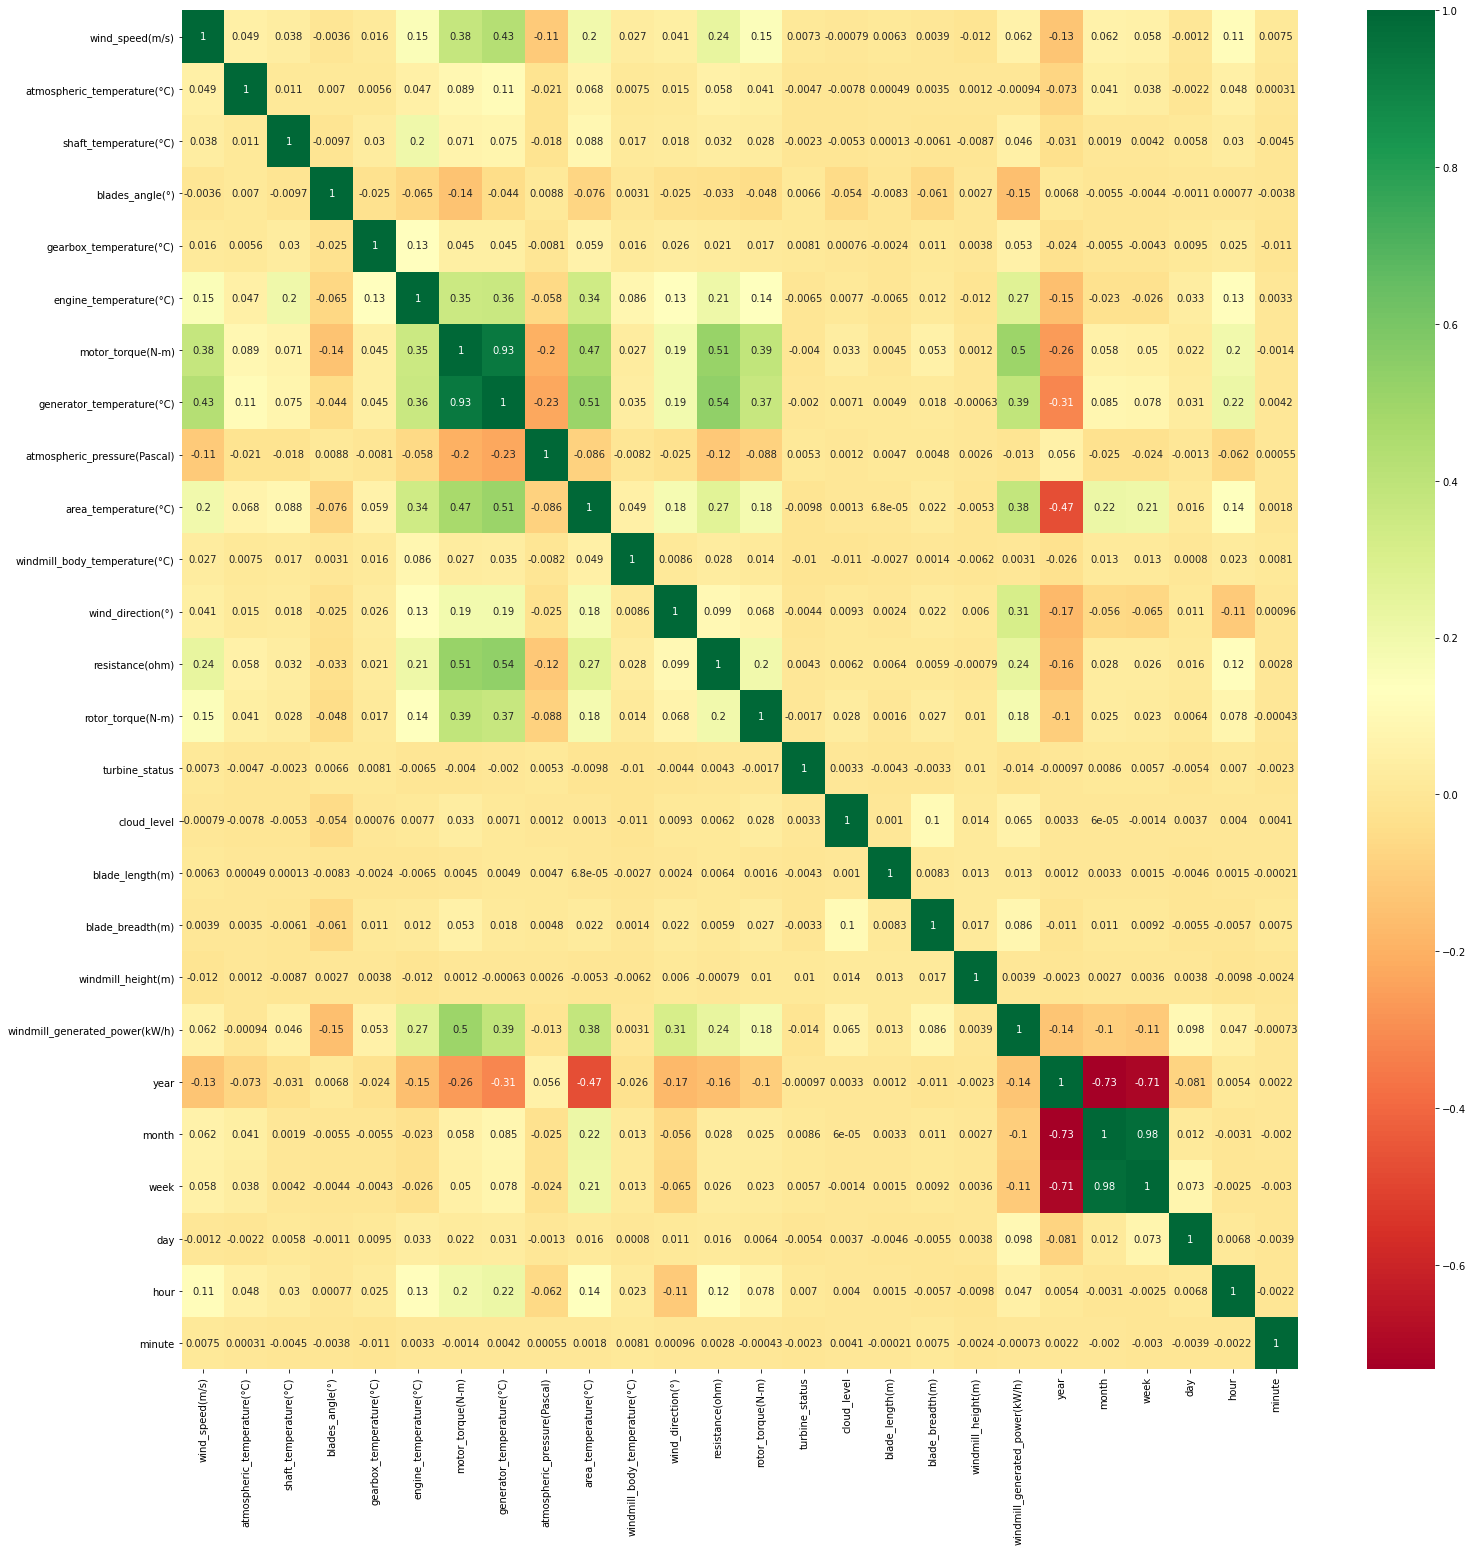

In [96]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [97]:
corrmat['windmill_body_temperature(°C)']>0.01


wind_speed(m/s)                    True
atmospheric_temperature(°C)       False
shaft_temperature(°C)              True
blades_angle(°)                   False
gearbox_temperature(°C)            True
engine_temperature(°C)             True
motor_torque(N-m)                  True
generator_temperature(°C)          True
atmospheric_pressure(Pascal)      False
area_temperature(°C)               True
windmill_body_temperature(°C)      True
wind_direction(°)                 False
resistance(ohm)                    True
rotor_torque(N-m)                  True
turbine_status                    False
cloud_level                       False
blade_length(m)                   False
blade_breadth(m)                  False
windmill_height(m)                False
windmill_generated_power(kW/h)    False
year                              False
month                              True
week                               True
day                               False
hour                               True


In [127]:
X=X[['month', 'blades_angle(°)', 'generator_temperature(°C)',
       'motor_torque(N-m)', 'year', 'week', 'hour', 'resistance(ohm)',
       
       ]]
#    'engine_temperature(°C)',
# 'motor_torque(N-m)',
# 'generator_temperature(°C)',
# 'area_temperature(°C)',
# 'wind_direction(°)',
# 'resistance(ohm)',
# 'rotor_torque(N-m)',
 

In [128]:
y= train['windmill_generated_power(kW/h)']

# Random Forest Regressor

In [129]:
regr = RandomForestRegressor(random_state=0)

In [130]:
regr.fit(X, y)

RandomForestRegressor(random_state=0)

In [131]:
test1=process(test)
#test1=test1.drop([
#    'engine_temperature(°C)',
# 'motor_torque(N-m)',
 #'generator_temperature(°C)',
 #'area_temperature(°C)',
 #'wind_direction(°)',
 #'resistance(ohm)',
 #'rotor_torque(N-m)'],axis=1)

C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """
C:\anaconda\envs\tenserflow\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  del sys.path[0]


In [132]:
test1=test1[['month', 'blades_angle(°)', 'generator_temperature(°C)',
       'motor_torque(N-m)', 'year', 'week', 'hour', 'resistance(ohm)',
       
       ]]

In [133]:
pre=regr.predict(test1)

In [134]:
data={'tracking_id': test['tracking_id'],
     'datetime': test['datetime'],
     "windmill_generated_power(kW/h)":pre}

In [135]:
output=pd.DataFrame(data,columns=['tracking_id','datetime','windmill_generated_power(kW/h)']) 
output.to_csv(path_or_buf=r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\newpred\predict7randomregressor.csv",index=False,header=True)

In [136]:
predict=pd.read_csv(r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\newpred\predict6randomregressor.csv")

In [137]:
predict['windmill_generated_power(kW/h)']

0         2.363555
1         2.421662
2         3.510175
3         7.289432
4         3.590904
           ...    
12081     6.416068
12082     3.200855
12083     5.227466
12084     5.468533
12085    10.172026
Name: windmill_generated_power(kW/h), Length: 12086, dtype: float64

# Catbooster

In [138]:
xgb_r = CatBoostRegressor(iterations=20000, 
                           task_type="GPU",
                           devices='0:1',
                          depth=3, learning_rate=0.3, loss_function='RMSE')

In [139]:
xgb_r.fit(X,y)

0:	learn: 2.2240597	total: 12.7ms	remaining: 4m 14s
1:	learn: 2.1673764	total: 25ms	remaining: 4m 10s
2:	learn: 2.1670798	total: 35.9ms	remaining: 3m 59s
3:	learn: 2.1670286	total: 49.8ms	remaining: 4m 9s
4:	learn: 2.0559116	total: 65.2ms	remaining: 4m 20s
5:	learn: 2.0005239	total: 80.7ms	remaining: 4m 28s
6:	learn: 1.9713670	total: 95.2ms	remaining: 4m 32s
7:	learn: 1.9471120	total: 108ms	remaining: 4m 30s
8:	learn: 1.9000480	total: 123ms	remaining: 4m 33s
9:	learn: 1.9000474	total: 136ms	remaining: 4m 31s
10:	learn: 1.8752116	total: 149ms	remaining: 4m 30s
11:	learn: 1.8736629	total: 163ms	remaining: 4m 31s
12:	learn: 1.8522214	total: 177ms	remaining: 4m 32s
13:	learn: 1.8493737	total: 191ms	remaining: 4m 32s
14:	learn: 1.8489979	total: 204ms	remaining: 4m 32s
15:	learn: 1.7708485	total: 219ms	remaining: 4m 33s
16:	learn: 1.7705434	total: 229ms	remaining: 4m 29s
17:	learn: 1.7542466	total: 242ms	remaining: 4m 28s
18:	learn: 1.7438692	total: 253ms	remaining: 4m 26s
19:	learn: 1.74370

171:	learn: 1.0052206	total: 2.06s	remaining: 3m 58s
172:	learn: 1.0051909	total: 2.08s	remaining: 3m 58s
173:	learn: 1.0049689	total: 2.09s	remaining: 3m 58s
174:	learn: 1.0043911	total: 2.1s	remaining: 3m 58s
175:	learn: 1.0043884	total: 2.11s	remaining: 3m 58s
176:	learn: 1.0043832	total: 2.13s	remaining: 3m 58s
177:	learn: 1.0020620	total: 2.14s	remaining: 3m 58s
178:	learn: 1.0014812	total: 2.15s	remaining: 3m 58s
179:	learn: 1.0009625	total: 2.17s	remaining: 3m 58s
180:	learn: 1.0008824	total: 2.18s	remaining: 3m 58s
181:	learn: 1.0003778	total: 2.19s	remaining: 3m 58s
182:	learn: 1.0003737	total: 2.2s	remaining: 3m 58s
183:	learn: 0.9973797	total: 2.21s	remaining: 3m 58s
184:	learn: 0.9965401	total: 2.23s	remaining: 3m 58s
185:	learn: 0.9958535	total: 2.24s	remaining: 3m 58s
186:	learn: 0.9958392	total: 2.25s	remaining: 3m 58s
187:	learn: 0.9956559	total: 2.26s	remaining: 3m 58s
188:	learn: 0.9946279	total: 2.27s	remaining: 3m 58s
189:	learn: 0.9946094	total: 2.28s	remaining: 3m

329:	learn: 0.9322880	total: 3.9s	remaining: 3m 52s
330:	learn: 0.9321874	total: 3.9s	remaining: 3m 52s
331:	learn: 0.9319665	total: 3.92s	remaining: 3m 52s
332:	learn: 0.9319655	total: 3.93s	remaining: 3m 51s
333:	learn: 0.9317406	total: 3.94s	remaining: 3m 51s
334:	learn: 0.9314599	total: 3.95s	remaining: 3m 51s
335:	learn: 0.9314564	total: 3.96s	remaining: 3m 52s
336:	learn: 0.9314513	total: 3.98s	remaining: 3m 52s
337:	learn: 0.9310663	total: 3.99s	remaining: 3m 52s
338:	learn: 0.9306172	total: 4.01s	remaining: 3m 52s
339:	learn: 0.9300507	total: 4.02s	remaining: 3m 52s
340:	learn: 0.9299741	total: 4.03s	remaining: 3m 52s
341:	learn: 0.9296586	total: 4.05s	remaining: 3m 52s
342:	learn: 0.9291097	total: 4.06s	remaining: 3m 52s
343:	learn: 0.9287300	total: 4.08s	remaining: 3m 53s
344:	learn: 0.9273158	total: 4.09s	remaining: 3m 53s
345:	learn: 0.9271604	total: 4.11s	remaining: 3m 53s
346:	learn: 0.9271492	total: 4.12s	remaining: 3m 53s
347:	learn: 0.9271244	total: 4.13s	remaining: 3m

484:	learn: 0.8937660	total: 5.88s	remaining: 3m 56s
485:	learn: 0.8937260	total: 5.9s	remaining: 3m 56s
486:	learn: 0.8936334	total: 5.91s	remaining: 3m 56s
487:	learn: 0.8936269	total: 5.92s	remaining: 3m 56s
488:	learn: 0.8936156	total: 5.94s	remaining: 3m 57s
489:	learn: 0.8935674	total: 5.96s	remaining: 3m 57s
490:	learn: 0.8928699	total: 5.97s	remaining: 3m 57s
491:	learn: 0.8915356	total: 5.98s	remaining: 3m 57s
492:	learn: 0.8915066	total: 6s	remaining: 3m 57s
493:	learn: 0.8914948	total: 6.01s	remaining: 3m 57s
494:	learn: 0.8913852	total: 6.03s	remaining: 3m 57s
495:	learn: 0.8913726	total: 6.04s	remaining: 3m 57s
496:	learn: 0.8905773	total: 6.06s	remaining: 3m 57s
497:	learn: 0.8905170	total: 6.08s	remaining: 3m 57s
498:	learn: 0.8903728	total: 6.09s	remaining: 3m 57s
499:	learn: 0.8903706	total: 6.1s	remaining: 3m 57s
500:	learn: 0.8903581	total: 6.11s	remaining: 3m 57s
501:	learn: 0.8884745	total: 6.12s	remaining: 3m 57s
502:	learn: 0.8877373	total: 6.13s	remaining: 3m 57

639:	learn: 0.8415817	total: 7.73s	remaining: 3m 53s
640:	learn: 0.8415636	total: 7.75s	remaining: 3m 54s
641:	learn: 0.8389283	total: 7.76s	remaining: 3m 54s
642:	learn: 0.8389240	total: 7.78s	remaining: 3m 54s
643:	learn: 0.8388493	total: 7.79s	remaining: 3m 54s
644:	learn: 0.8377842	total: 7.81s	remaining: 3m 54s
645:	learn: 0.8377779	total: 7.82s	remaining: 3m 54s
646:	learn: 0.8372743	total: 7.83s	remaining: 3m 54s
647:	learn: 0.8372385	total: 7.84s	remaining: 3m 54s
648:	learn: 0.8372283	total: 7.86s	remaining: 3m 54s
649:	learn: 0.8371590	total: 7.87s	remaining: 3m 54s
650:	learn: 0.8369922	total: 7.88s	remaining: 3m 54s
651:	learn: 0.8368428	total: 7.89s	remaining: 3m 54s
652:	learn: 0.8368109	total: 7.91s	remaining: 3m 54s
653:	learn: 0.8367337	total: 7.92s	remaining: 3m 54s
654:	learn: 0.8367329	total: 7.93s	remaining: 3m 54s
655:	learn: 0.8367326	total: 7.94s	remaining: 3m 54s
656:	learn: 0.8366844	total: 7.95s	remaining: 3m 54s
657:	learn: 0.8363527	total: 7.96s	remaining: 

795:	learn: 0.8080868	total: 9.56s	remaining: 3m 50s
796:	learn: 0.8080836	total: 9.57s	remaining: 3m 50s
797:	learn: 0.8065887	total: 9.59s	remaining: 3m 50s
798:	learn: 0.8064371	total: 9.6s	remaining: 3m 50s
799:	learn: 0.8062157	total: 9.61s	remaining: 3m 50s
800:	learn: 0.8061024	total: 9.63s	remaining: 3m 50s
801:	learn: 0.8061017	total: 9.64s	remaining: 3m 50s
802:	learn: 0.8060568	total: 9.65s	remaining: 3m 50s
803:	learn: 0.8060416	total: 9.66s	remaining: 3m 50s
804:	learn: 0.8060409	total: 9.68s	remaining: 3m 50s
805:	learn: 0.8060077	total: 9.69s	remaining: 3m 50s
806:	learn: 0.8058800	total: 9.71s	remaining: 3m 50s
807:	learn: 0.8058784	total: 9.72s	remaining: 3m 50s
808:	learn: 0.8058512	total: 9.73s	remaining: 3m 50s
809:	learn: 0.8058512	total: 9.74s	remaining: 3m 50s
810:	learn: 0.8057971	total: 9.75s	remaining: 3m 50s
811:	learn: 0.8057011	total: 9.76s	remaining: 3m 50s
812:	learn: 0.8050016	total: 9.78s	remaining: 3m 50s
813:	learn: 0.8049525	total: 9.79s	remaining: 3

960:	learn: 0.7888857	total: 11.6s	remaining: 3m 50s
961:	learn: 0.7888852	total: 11.6s	remaining: 3m 50s
962:	learn: 0.7877519	total: 11.6s	remaining: 3m 50s
963:	learn: 0.7877184	total: 11.7s	remaining: 3m 50s
964:	learn: 0.7877073	total: 11.7s	remaining: 3m 50s
965:	learn: 0.7875352	total: 11.7s	remaining: 3m 50s
966:	learn: 0.7874656	total: 11.7s	remaining: 3m 50s
967:	learn: 0.7874296	total: 11.7s	remaining: 3m 50s
968:	learn: 0.7859028	total: 11.7s	remaining: 3m 50s
969:	learn: 0.7859009	total: 11.7s	remaining: 3m 50s
970:	learn: 0.7858951	total: 11.7s	remaining: 3m 50s
971:	learn: 0.7858885	total: 11.8s	remaining: 3m 50s
972:	learn: 0.7856605	total: 11.8s	remaining: 3m 50s
973:	learn: 0.7856498	total: 11.8s	remaining: 3m 50s
974:	learn: 0.7854694	total: 11.8s	remaining: 3m 50s
975:	learn: 0.7854470	total: 11.8s	remaining: 3m 50s
976:	learn: 0.7854464	total: 11.8s	remaining: 3m 50s
977:	learn: 0.7854241	total: 11.8s	remaining: 3m 50s
978:	learn: 0.7851153	total: 11.8s	remaining: 

1129:	learn: 0.7709980	total: 13.7s	remaining: 3m 48s
1130:	learn: 0.7709812	total: 13.7s	remaining: 3m 48s
1131:	learn: 0.7709737	total: 13.7s	remaining: 3m 48s
1132:	learn: 0.7709170	total: 13.7s	remaining: 3m 48s
1133:	learn: 0.7709079	total: 13.7s	remaining: 3m 48s
1134:	learn: 0.7709012	total: 13.8s	remaining: 3m 48s
1135:	learn: 0.7709012	total: 13.8s	remaining: 3m 48s
1136:	learn: 0.7708612	total: 13.8s	remaining: 3m 48s
1137:	learn: 0.7707988	total: 13.8s	remaining: 3m 48s
1138:	learn: 0.7706973	total: 13.8s	remaining: 3m 48s
1139:	learn: 0.7706584	total: 13.8s	remaining: 3m 48s
1140:	learn: 0.7706583	total: 13.8s	remaining: 3m 48s
1141:	learn: 0.7705367	total: 13.8s	remaining: 3m 48s
1142:	learn: 0.7705328	total: 13.8s	remaining: 3m 48s
1143:	learn: 0.7705271	total: 13.9s	remaining: 3m 48s
1144:	learn: 0.7704414	total: 13.9s	remaining: 3m 48s
1145:	learn: 0.7703979	total: 13.9s	remaining: 3m 48s
1146:	learn: 0.7703972	total: 13.9s	remaining: 3m 48s
1147:	learn: 0.7703965	total

1291:	learn: 0.7604885	total: 15.7s	remaining: 3m 47s
1292:	learn: 0.7604880	total: 15.7s	remaining: 3m 47s
1293:	learn: 0.7604804	total: 15.7s	remaining: 3m 47s
1294:	learn: 0.7604767	total: 15.8s	remaining: 3m 47s
1295:	learn: 0.7604567	total: 15.8s	remaining: 3m 47s
1296:	learn: 0.7603155	total: 15.8s	remaining: 3m 47s
1297:	learn: 0.7602821	total: 15.8s	remaining: 3m 47s
1298:	learn: 0.7600640	total: 15.8s	remaining: 3m 47s
1299:	learn: 0.7600617	total: 15.8s	remaining: 3m 47s
1300:	learn: 0.7600613	total: 15.8s	remaining: 3m 47s
1301:	learn: 0.7600603	total: 15.8s	remaining: 3m 47s
1302:	learn: 0.7600599	total: 15.8s	remaining: 3m 47s
1303:	learn: 0.7600036	total: 15.9s	remaining: 3m 47s
1304:	learn: 0.7599308	total: 15.9s	remaining: 3m 47s
1305:	learn: 0.7598865	total: 15.9s	remaining: 3m 47s
1306:	learn: 0.7597086	total: 15.9s	remaining: 3m 47s
1307:	learn: 0.7597048	total: 15.9s	remaining: 3m 47s
1308:	learn: 0.7596428	total: 15.9s	remaining: 3m 47s
1309:	learn: 0.7595587	total

1446:	learn: 0.7513572	total: 17.6s	remaining: 3m 45s
1447:	learn: 0.7513561	total: 17.6s	remaining: 3m 45s
1448:	learn: 0.7513504	total: 17.6s	remaining: 3m 45s
1449:	learn: 0.7512746	total: 17.6s	remaining: 3m 45s
1450:	learn: 0.7512250	total: 17.6s	remaining: 3m 45s
1451:	learn: 0.7511947	total: 17.6s	remaining: 3m 45s
1452:	learn: 0.7511944	total: 17.6s	remaining: 3m 45s
1453:	learn: 0.7511749	total: 17.7s	remaining: 3m 45s
1454:	learn: 0.7511312	total: 17.7s	remaining: 3m 45s
1455:	learn: 0.7511311	total: 17.7s	remaining: 3m 45s
1456:	learn: 0.7511297	total: 17.7s	remaining: 3m 45s
1457:	learn: 0.7507175	total: 17.7s	remaining: 3m 45s
1458:	learn: 0.7507171	total: 17.7s	remaining: 3m 45s
1459:	learn: 0.7505917	total: 17.7s	remaining: 3m 45s
1460:	learn: 0.7505165	total: 17.8s	remaining: 3m 45s
1461:	learn: 0.7505164	total: 17.8s	remaining: 3m 45s
1462:	learn: 0.7505161	total: 17.8s	remaining: 3m 45s
1463:	learn: 0.7504056	total: 17.8s	remaining: 3m 45s
1464:	learn: 0.7504036	total

1604:	learn: 0.7429707	total: 19.6s	remaining: 3m 44s
1605:	learn: 0.7429691	total: 19.6s	remaining: 3m 44s
1606:	learn: 0.7427931	total: 19.6s	remaining: 3m 44s
1607:	learn: 0.7425279	total: 19.6s	remaining: 3m 44s
1608:	learn: 0.7422241	total: 19.6s	remaining: 3m 44s
1609:	learn: 0.7422097	total: 19.6s	remaining: 3m 44s
1610:	learn: 0.7422060	total: 19.6s	remaining: 3m 44s
1611:	learn: 0.7420501	total: 19.7s	remaining: 3m 44s
1612:	learn: 0.7420043	total: 19.7s	remaining: 3m 44s
1613:	learn: 0.7420038	total: 19.7s	remaining: 3m 44s
1614:	learn: 0.7418686	total: 19.7s	remaining: 3m 44s
1615:	learn: 0.7417940	total: 19.7s	remaining: 3m 44s
1616:	learn: 0.7417926	total: 19.7s	remaining: 3m 44s
1617:	learn: 0.7417925	total: 19.7s	remaining: 3m 44s
1618:	learn: 0.7417863	total: 19.7s	remaining: 3m 44s
1619:	learn: 0.7417832	total: 19.7s	remaining: 3m 44s
1620:	learn: 0.7417817	total: 19.8s	remaining: 3m 44s
1621:	learn: 0.7417801	total: 19.8s	remaining: 3m 43s
1622:	learn: 0.7417528	total

1772:	learn: 0.7357329	total: 21.6s	remaining: 3m 42s
1773:	learn: 0.7355071	total: 21.6s	remaining: 3m 42s
1774:	learn: 0.7354400	total: 21.7s	remaining: 3m 42s
1775:	learn: 0.7354023	total: 21.7s	remaining: 3m 42s
1776:	learn: 0.7353851	total: 21.7s	remaining: 3m 42s
1777:	learn: 0.7353849	total: 21.7s	remaining: 3m 42s
1778:	learn: 0.7353823	total: 21.7s	remaining: 3m 42s
1779:	learn: 0.7353643	total: 21.7s	remaining: 3m 42s
1780:	learn: 0.7353643	total: 21.7s	remaining: 3m 42s
1781:	learn: 0.7353270	total: 21.8s	remaining: 3m 42s
1782:	learn: 0.7353051	total: 21.8s	remaining: 3m 42s
1783:	learn: 0.7352888	total: 21.8s	remaining: 3m 42s
1784:	learn: 0.7352596	total: 21.8s	remaining: 3m 42s
1785:	learn: 0.7351217	total: 21.8s	remaining: 3m 42s
1786:	learn: 0.7350535	total: 21.8s	remaining: 3m 42s
1787:	learn: 0.7348369	total: 21.8s	remaining: 3m 42s
1788:	learn: 0.7347830	total: 21.9s	remaining: 3m 42s
1789:	learn: 0.7345518	total: 21.9s	remaining: 3m 42s
1790:	learn: 0.7345486	total

1931:	learn: 0.7274166	total: 23.6s	remaining: 3m 41s
1932:	learn: 0.7273125	total: 23.7s	remaining: 3m 41s
1933:	learn: 0.7272640	total: 23.7s	remaining: 3m 41s
1934:	learn: 0.7272328	total: 23.7s	remaining: 3m 41s
1935:	learn: 0.7271987	total: 23.7s	remaining: 3m 41s
1936:	learn: 0.7271620	total: 23.7s	remaining: 3m 41s
1937:	learn: 0.7269970	total: 23.7s	remaining: 3m 41s
1938:	learn: 0.7269967	total: 23.7s	remaining: 3m 41s
1939:	learn: 0.7269967	total: 23.8s	remaining: 3m 41s
1940:	learn: 0.7269938	total: 23.8s	remaining: 3m 41s
1941:	learn: 0.7269925	total: 23.8s	remaining: 3m 41s
1942:	learn: 0.7269921	total: 23.8s	remaining: 3m 41s
1943:	learn: 0.7264877	total: 23.8s	remaining: 3m 41s
1944:	learn: 0.7264662	total: 23.8s	remaining: 3m 41s
1945:	learn: 0.7264608	total: 23.8s	remaining: 3m 41s
1946:	learn: 0.7262917	total: 23.8s	remaining: 3m 41s
1947:	learn: 0.7262915	total: 23.9s	remaining: 3m 41s
1948:	learn: 0.7262896	total: 23.9s	remaining: 3m 41s
1949:	learn: 0.7262832	total

2092:	learn: 0.7206637	total: 25.7s	remaining: 3m 39s
2093:	learn: 0.7206360	total: 25.7s	remaining: 3m 39s
2094:	learn: 0.7204205	total: 25.7s	remaining: 3m 39s
2095:	learn: 0.7204202	total: 25.7s	remaining: 3m 39s
2096:	learn: 0.7204191	total: 25.7s	remaining: 3m 39s
2097:	learn: 0.7203798	total: 25.8s	remaining: 3m 39s
2098:	learn: 0.7202750	total: 25.8s	remaining: 3m 39s
2099:	learn: 0.7202746	total: 25.8s	remaining: 3m 39s
2100:	learn: 0.7202735	total: 25.8s	remaining: 3m 39s
2101:	learn: 0.7202471	total: 25.8s	remaining: 3m 39s
2102:	learn: 0.7201202	total: 25.8s	remaining: 3m 39s
2103:	learn: 0.7201197	total: 25.8s	remaining: 3m 39s
2104:	learn: 0.7201104	total: 25.8s	remaining: 3m 39s
2105:	learn: 0.7201050	total: 25.8s	remaining: 3m 39s
2106:	learn: 0.7198832	total: 25.9s	remaining: 3m 39s
2107:	learn: 0.7198027	total: 25.9s	remaining: 3m 39s
2108:	learn: 0.7197902	total: 25.9s	remaining: 3m 39s
2109:	learn: 0.7197645	total: 25.9s	remaining: 3m 39s
2110:	learn: 0.7197630	total

2255:	learn: 0.7171131	total: 27.7s	remaining: 3m 38s
2256:	learn: 0.7171129	total: 27.8s	remaining: 3m 38s
2257:	learn: 0.7171092	total: 27.8s	remaining: 3m 38s
2258:	learn: 0.7171083	total: 27.8s	remaining: 3m 38s
2259:	learn: 0.7171083	total: 27.8s	remaining: 3m 38s
2260:	learn: 0.7170735	total: 27.8s	remaining: 3m 38s
2261:	learn: 0.7170714	total: 27.8s	remaining: 3m 38s
2262:	learn: 0.7170393	total: 27.8s	remaining: 3m 38s
2263:	learn: 0.7170347	total: 27.8s	remaining: 3m 38s
2264:	learn: 0.7170326	total: 27.8s	remaining: 3m 38s
2265:	learn: 0.7170185	total: 27.9s	remaining: 3m 38s
2266:	learn: 0.7169901	total: 27.9s	remaining: 3m 38s
2267:	learn: 0.7169897	total: 27.9s	remaining: 3m 37s
2268:	learn: 0.7169896	total: 27.9s	remaining: 3m 37s
2269:	learn: 0.7169864	total: 27.9s	remaining: 3m 37s
2270:	learn: 0.7169812	total: 27.9s	remaining: 3m 37s
2271:	learn: 0.7169811	total: 27.9s	remaining: 3m 37s
2272:	learn: 0.7169807	total: 27.9s	remaining: 3m 37s
2273:	learn: 0.7169408	total

2419:	learn: 0.7113106	total: 29.8s	remaining: 3m 36s
2420:	learn: 0.7113095	total: 29.8s	remaining: 3m 36s
2421:	learn: 0.7112895	total: 29.8s	remaining: 3m 36s
2422:	learn: 0.7112412	total: 29.8s	remaining: 3m 36s
2423:	learn: 0.7112334	total: 29.8s	remaining: 3m 36s
2424:	learn: 0.7112303	total: 29.9s	remaining: 3m 36s
2425:	learn: 0.7112302	total: 29.9s	remaining: 3m 36s
2426:	learn: 0.7112263	total: 29.9s	remaining: 3m 36s
2427:	learn: 0.7112263	total: 29.9s	remaining: 3m 36s
2428:	learn: 0.7112260	total: 29.9s	remaining: 3m 36s
2429:	learn: 0.7112257	total: 29.9s	remaining: 3m 36s
2430:	learn: 0.7112248	total: 29.9s	remaining: 3m 36s
2431:	learn: 0.7112241	total: 29.9s	remaining: 3m 36s
2432:	learn: 0.7111686	total: 29.9s	remaining: 3m 36s
2433:	learn: 0.7111650	total: 30s	remaining: 3m 36s
2434:	learn: 0.7111570	total: 30s	remaining: 3m 36s
2435:	learn: 0.7111549	total: 30s	remaining: 3m 36s
2436:	learn: 0.7111129	total: 30s	remaining: 3m 36s
2437:	learn: 0.7111092	total: 30s	re

2578:	learn: 0.7070763	total: 31.8s	remaining: 3m 34s
2579:	learn: 0.7070760	total: 31.8s	remaining: 3m 34s
2580:	learn: 0.7070758	total: 31.8s	remaining: 3m 34s
2581:	learn: 0.7070757	total: 31.8s	remaining: 3m 34s
2582:	learn: 0.7070757	total: 31.8s	remaining: 3m 34s
2583:	learn: 0.7070756	total: 31.9s	remaining: 3m 34s
2584:	learn: 0.7070756	total: 31.9s	remaining: 3m 34s
2585:	learn: 0.7070755	total: 31.9s	remaining: 3m 34s
2586:	learn: 0.7070755	total: 31.9s	remaining: 3m 34s
2587:	learn: 0.7070755	total: 31.9s	remaining: 3m 34s
2588:	learn: 0.7070755	total: 31.9s	remaining: 3m 34s
2589:	learn: 0.7070755	total: 31.9s	remaining: 3m 34s
2590:	learn: 0.7070171	total: 31.9s	remaining: 3m 34s
2591:	learn: 0.7070167	total: 32s	remaining: 3m 34s
2592:	learn: 0.7069428	total: 32s	remaining: 3m 34s
2593:	learn: 0.7068818	total: 32s	remaining: 3m 34s
2594:	learn: 0.7068802	total: 32s	remaining: 3m 34s
2595:	learn: 0.7068798	total: 32s	remaining: 3m 34s
2596:	learn: 0.7068329	total: 32s	rema

2743:	learn: 0.7034033	total: 33.6s	remaining: 3m 31s
2744:	learn: 0.7034007	total: 33.6s	remaining: 3m 31s
2745:	learn: 0.7034004	total: 33.6s	remaining: 3m 31s
2746:	learn: 0.7033986	total: 33.6s	remaining: 3m 31s
2747:	learn: 0.7033986	total: 33.6s	remaining: 3m 31s
2748:	learn: 0.7033986	total: 33.7s	remaining: 3m 31s
2749:	learn: 0.7033843	total: 33.7s	remaining: 3m 31s
2750:	learn: 0.7033833	total: 33.7s	remaining: 3m 31s
2751:	learn: 0.7032931	total: 33.7s	remaining: 3m 31s
2752:	learn: 0.7029809	total: 33.7s	remaining: 3m 31s
2753:	learn: 0.7029723	total: 33.7s	remaining: 3m 31s
2754:	learn: 0.7029562	total: 33.7s	remaining: 3m 31s
2755:	learn: 0.7028479	total: 33.7s	remaining: 3m 31s
2756:	learn: 0.7028389	total: 33.7s	remaining: 3m 31s
2757:	learn: 0.7028367	total: 33.8s	remaining: 3m 31s
2758:	learn: 0.7027504	total: 33.8s	remaining: 3m 31s
2759:	learn: 0.7027453	total: 33.8s	remaining: 3m 31s
2760:	learn: 0.7027366	total: 33.8s	remaining: 3m 30s
2761:	learn: 0.7026447	total

2906:	learn: 0.6993695	total: 35.4s	remaining: 3m 28s
2907:	learn: 0.6993688	total: 35.4s	remaining: 3m 28s
2908:	learn: 0.6993686	total: 35.4s	remaining: 3m 28s
2909:	learn: 0.6993683	total: 35.5s	remaining: 3m 28s
2910:	learn: 0.6993677	total: 35.5s	remaining: 3m 28s
2911:	learn: 0.6993677	total: 35.5s	remaining: 3m 28s
2912:	learn: 0.6993676	total: 35.5s	remaining: 3m 28s
2913:	learn: 0.6992608	total: 35.5s	remaining: 3m 28s
2914:	learn: 0.6992599	total: 35.5s	remaining: 3m 28s
2915:	learn: 0.6992515	total: 35.5s	remaining: 3m 28s
2916:	learn: 0.6992408	total: 35.5s	remaining: 3m 28s
2917:	learn: 0.6992406	total: 35.5s	remaining: 3m 28s
2918:	learn: 0.6992150	total: 35.5s	remaining: 3m 28s
2919:	learn: 0.6991316	total: 35.6s	remaining: 3m 27s
2920:	learn: 0.6991067	total: 35.6s	remaining: 3m 27s
2921:	learn: 0.6990163	total: 35.6s	remaining: 3m 27s
2922:	learn: 0.6989871	total: 35.6s	remaining: 3m 27s
2923:	learn: 0.6989869	total: 35.6s	remaining: 3m 27s
2924:	learn: 0.6989836	total

3072:	learn: 0.6961527	total: 37.2s	remaining: 3m 25s
3073:	learn: 0.6961523	total: 37.3s	remaining: 3m 25s
3074:	learn: 0.6961512	total: 37.3s	remaining: 3m 25s
3075:	learn: 0.6961511	total: 37.3s	remaining: 3m 25s
3076:	learn: 0.6961510	total: 37.3s	remaining: 3m 25s
3077:	learn: 0.6961411	total: 37.3s	remaining: 3m 25s
3078:	learn: 0.6961228	total: 37.3s	remaining: 3m 25s
3079:	learn: 0.6961219	total: 37.3s	remaining: 3m 25s
3080:	learn: 0.6960736	total: 37.4s	remaining: 3m 25s
3081:	learn: 0.6960735	total: 37.4s	remaining: 3m 25s
3082:	learn: 0.6960666	total: 37.4s	remaining: 3m 25s
3083:	learn: 0.6959377	total: 37.4s	remaining: 3m 25s
3084:	learn: 0.6959038	total: 37.4s	remaining: 3m 25s
3085:	learn: 0.6956249	total: 37.4s	remaining: 3m 25s
3086:	learn: 0.6955018	total: 37.4s	remaining: 3m 25s
3087:	learn: 0.6954738	total: 37.4s	remaining: 3m 25s
3088:	learn: 0.6954645	total: 37.5s	remaining: 3m 25s
3089:	learn: 0.6954642	total: 37.5s	remaining: 3m 25s
3090:	learn: 0.6954629	total

3233:	learn: 0.6917189	total: 39.1s	remaining: 3m 22s
3234:	learn: 0.6917187	total: 39.1s	remaining: 3m 22s
3235:	learn: 0.6917171	total: 39.1s	remaining: 3m 22s
3236:	learn: 0.6916993	total: 39.1s	remaining: 3m 22s
3237:	learn: 0.6916978	total: 39.1s	remaining: 3m 22s
3238:	learn: 0.6916970	total: 39.1s	remaining: 3m 22s
3239:	learn: 0.6916638	total: 39.1s	remaining: 3m 22s
3240:	learn: 0.6916636	total: 39.1s	remaining: 3m 22s
3241:	learn: 0.6916473	total: 39.2s	remaining: 3m 22s
3242:	learn: 0.6916473	total: 39.2s	remaining: 3m 22s
3243:	learn: 0.6915324	total: 39.2s	remaining: 3m 22s
3244:	learn: 0.6915203	total: 39.2s	remaining: 3m 22s
3245:	learn: 0.6914730	total: 39.2s	remaining: 3m 22s
3246:	learn: 0.6914729	total: 39.2s	remaining: 3m 22s
3247:	learn: 0.6914673	total: 39.2s	remaining: 3m 22s
3248:	learn: 0.6914667	total: 39.2s	remaining: 3m 22s
3249:	learn: 0.6914646	total: 39.2s	remaining: 3m 22s
3250:	learn: 0.6914645	total: 39.3s	remaining: 3m 22s
3251:	learn: 0.6914644	total

3400:	learn: 0.6882842	total: 40.9s	remaining: 3m 19s
3401:	learn: 0.6882832	total: 40.9s	remaining: 3m 19s
3402:	learn: 0.6882831	total: 40.9s	remaining: 3m 19s
3403:	learn: 0.6882769	total: 40.9s	remaining: 3m 19s
3404:	learn: 0.6882767	total: 40.9s	remaining: 3m 19s
3405:	learn: 0.6882702	total: 40.9s	remaining: 3m 19s
3406:	learn: 0.6882701	total: 40.9s	remaining: 3m 19s
3407:	learn: 0.6882700	total: 40.9s	remaining: 3m 19s
3408:	learn: 0.6882699	total: 41s	remaining: 3m 19s
3409:	learn: 0.6882699	total: 41s	remaining: 3m 19s
3410:	learn: 0.6882699	total: 41s	remaining: 3m 19s
3411:	learn: 0.6882699	total: 41s	remaining: 3m 19s
3412:	learn: 0.6882699	total: 41s	remaining: 3m 19s
3413:	learn: 0.6882699	total: 41s	remaining: 3m 19s
3414:	learn: 0.6882698	total: 41s	remaining: 3m 19s
3415:	learn: 0.6882696	total: 41s	remaining: 3m 19s
3416:	learn: 0.6882693	total: 41s	remaining: 3m 19s
3417:	learn: 0.6882689	total: 41.1s	remaining: 3m 19s
3418:	learn: 0.6882330	total: 41.1s	remaining:

3564:	learn: 0.6852343	total: 42.7s	remaining: 3m 16s
3565:	learn: 0.6852339	total: 42.7s	remaining: 3m 16s
3566:	learn: 0.6852335	total: 42.7s	remaining: 3m 16s
3567:	learn: 0.6852333	total: 42.7s	remaining: 3m 16s
3568:	learn: 0.6852332	total: 42.7s	remaining: 3m 16s
3569:	learn: 0.6852329	total: 42.7s	remaining: 3m 16s
3570:	learn: 0.6852297	total: 42.7s	remaining: 3m 16s
3571:	learn: 0.6852296	total: 42.7s	remaining: 3m 16s
3572:	learn: 0.6852175	total: 42.8s	remaining: 3m 16s
3573:	learn: 0.6852159	total: 42.8s	remaining: 3m 16s
3574:	learn: 0.6852158	total: 42.8s	remaining: 3m 16s
3575:	learn: 0.6852110	total: 42.8s	remaining: 3m 16s
3576:	learn: 0.6852080	total: 42.8s	remaining: 3m 16s
3577:	learn: 0.6851987	total: 42.8s	remaining: 3m 16s
3578:	learn: 0.6851980	total: 42.8s	remaining: 3m 16s
3579:	learn: 0.6851932	total: 42.8s	remaining: 3m 16s
3580:	learn: 0.6851897	total: 42.8s	remaining: 3m 16s
3581:	learn: 0.6851894	total: 42.9s	remaining: 3m 16s
3582:	learn: 0.6851890	total

3730:	learn: 0.6830099	total: 44.5s	remaining: 3m 14s
3731:	learn: 0.6830098	total: 44.5s	remaining: 3m 14s
3732:	learn: 0.6830090	total: 44.5s	remaining: 3m 14s
3733:	learn: 0.6828086	total: 44.5s	remaining: 3m 14s
3734:	learn: 0.6827968	total: 44.5s	remaining: 3m 13s
3735:	learn: 0.6827767	total: 44.6s	remaining: 3m 13s
3736:	learn: 0.6827764	total: 44.6s	remaining: 3m 13s
3737:	learn: 0.6827732	total: 44.6s	remaining: 3m 13s
3738:	learn: 0.6827275	total: 44.6s	remaining: 3m 13s
3739:	learn: 0.6827272	total: 44.6s	remaining: 3m 13s
3740:	learn: 0.6827270	total: 44.6s	remaining: 3m 13s
3741:	learn: 0.6827094	total: 44.6s	remaining: 3m 13s
3742:	learn: 0.6827090	total: 44.6s	remaining: 3m 13s
3743:	learn: 0.6827088	total: 44.6s	remaining: 3m 13s
3744:	learn: 0.6827071	total: 44.7s	remaining: 3m 13s
3745:	learn: 0.6827071	total: 44.7s	remaining: 3m 13s
3746:	learn: 0.6827063	total: 44.7s	remaining: 3m 13s
3747:	learn: 0.6825888	total: 44.7s	remaining: 3m 13s
3748:	learn: 0.6825878	total

3887:	learn: 0.6807828	total: 46.3s	remaining: 3m 11s
3888:	learn: 0.6807825	total: 46.3s	remaining: 3m 11s
3889:	learn: 0.6807818	total: 46.3s	remaining: 3m 11s
3890:	learn: 0.6807816	total: 46.3s	remaining: 3m 11s
3891:	learn: 0.6807814	total: 46.3s	remaining: 3m 11s
3892:	learn: 0.6807775	total: 46.4s	remaining: 3m 11s
3893:	learn: 0.6807586	total: 46.4s	remaining: 3m 11s
3894:	learn: 0.6807377	total: 46.4s	remaining: 3m 11s
3895:	learn: 0.6807376	total: 46.4s	remaining: 3m 11s
3896:	learn: 0.6807373	total: 46.4s	remaining: 3m 11s
3897:	learn: 0.6807347	total: 46.4s	remaining: 3m 11s
3898:	learn: 0.6807340	total: 46.4s	remaining: 3m 11s
3899:	learn: 0.6807324	total: 46.4s	remaining: 3m 11s
3900:	learn: 0.6807121	total: 46.4s	remaining: 3m 11s
3901:	learn: 0.6805375	total: 46.5s	remaining: 3m 11s
3902:	learn: 0.6805355	total: 46.5s	remaining: 3m 11s
3903:	learn: 0.6805353	total: 46.5s	remaining: 3m 11s
3904:	learn: 0.6805345	total: 46.5s	remaining: 3m 11s
3905:	learn: 0.6805327	total

4045:	learn: 0.6791496	total: 48.1s	remaining: 3m 9s
4046:	learn: 0.6791496	total: 48.1s	remaining: 3m 9s
4047:	learn: 0.6791492	total: 48.1s	remaining: 3m 9s
4048:	learn: 0.6790579	total: 48.1s	remaining: 3m 9s
4049:	learn: 0.6790474	total: 48.1s	remaining: 3m 9s
4050:	learn: 0.6790394	total: 48.1s	remaining: 3m 9s
4051:	learn: 0.6790387	total: 48.2s	remaining: 3m 9s
4052:	learn: 0.6790334	total: 48.2s	remaining: 3m 9s
4053:	learn: 0.6789977	total: 48.2s	remaining: 3m 9s
4054:	learn: 0.6789975	total: 48.2s	remaining: 3m 9s
4055:	learn: 0.6789973	total: 48.2s	remaining: 3m 9s
4056:	learn: 0.6789936	total: 48.2s	remaining: 3m 9s
4057:	learn: 0.6789935	total: 48.2s	remaining: 3m 9s
4058:	learn: 0.6789935	total: 48.2s	remaining: 3m 9s
4059:	learn: 0.6789869	total: 48.3s	remaining: 3m 9s
4060:	learn: 0.6789511	total: 48.3s	remaining: 3m 9s
4061:	learn: 0.6789492	total: 48.3s	remaining: 3m 9s
4062:	learn: 0.6789492	total: 48.3s	remaining: 3m 9s
4063:	learn: 0.6789468	total: 48.3s	remaining:

4211:	learn: 0.6769139	total: 50s	remaining: 3m 7s
4212:	learn: 0.6769136	total: 50s	remaining: 3m 7s
4213:	learn: 0.6769027	total: 50s	remaining: 3m 7s
4214:	learn: 0.6769026	total: 50s	remaining: 3m 7s
4215:	learn: 0.6769022	total: 50s	remaining: 3m 7s
4216:	learn: 0.6768958	total: 50s	remaining: 3m 7s
4217:	learn: 0.6768665	total: 50s	remaining: 3m 7s
4218:	learn: 0.6768635	total: 50.1s	remaining: 3m 7s
4219:	learn: 0.6768635	total: 50.1s	remaining: 3m 7s
4220:	learn: 0.6768635	total: 50.1s	remaining: 3m 7s
4221:	learn: 0.6768631	total: 50.1s	remaining: 3m 7s
4222:	learn: 0.6768116	total: 50.1s	remaining: 3m 7s
4223:	learn: 0.6767604	total: 50.1s	remaining: 3m 7s
4224:	learn: 0.6767604	total: 50.1s	remaining: 3m 7s
4225:	learn: 0.6767603	total: 50.1s	remaining: 3m 7s
4226:	learn: 0.6767602	total: 50.2s	remaining: 3m 7s
4227:	learn: 0.6767603	total: 50.2s	remaining: 3m 7s
4228:	learn: 0.6767557	total: 50.2s	remaining: 3m 7s
4229:	learn: 0.6767557	total: 50.2s	remaining: 3m 7s
4230:	l

4384:	learn: 0.6738320	total: 51.9s	remaining: 3m 4s
4385:	learn: 0.6738248	total: 51.9s	remaining: 3m 4s
4386:	learn: 0.6737962	total: 52s	remaining: 3m 4s
4387:	learn: 0.6737962	total: 52s	remaining: 3m 4s
4388:	learn: 0.6737927	total: 52s	remaining: 3m 4s
4389:	learn: 0.6737914	total: 52s	remaining: 3m 4s
4390:	learn: 0.6737915	total: 52s	remaining: 3m 4s
4391:	learn: 0.6737908	total: 52s	remaining: 3m 4s
4392:	learn: 0.6737905	total: 52s	remaining: 3m 4s
4393:	learn: 0.6737878	total: 52s	remaining: 3m 4s
4394:	learn: 0.6737877	total: 52s	remaining: 3m 4s
4395:	learn: 0.6737870	total: 52.1s	remaining: 3m 4s
4396:	learn: 0.6737840	total: 52.1s	remaining: 3m 4s
4397:	learn: 0.6737838	total: 52.1s	remaining: 3m 4s
4398:	learn: 0.6737797	total: 52.1s	remaining: 3m 4s
4399:	learn: 0.6737668	total: 52.1s	remaining: 3m 4s
4400:	learn: 0.6737667	total: 52.1s	remaining: 3m 4s
4401:	learn: 0.6737663	total: 52.1s	remaining: 3m 4s
4402:	learn: 0.6737659	total: 52.1s	remaining: 3m 4s
4403:	learn

4552:	learn: 0.6705081	total: 54.1s	remaining: 3m 3s
4553:	learn: 0.6704605	total: 54.1s	remaining: 3m 3s
4554:	learn: 0.6704604	total: 54.1s	remaining: 3m 3s
4555:	learn: 0.6704602	total: 54.1s	remaining: 3m 3s
4556:	learn: 0.6704584	total: 54.2s	remaining: 3m 3s
4557:	learn: 0.6704503	total: 54.2s	remaining: 3m 3s
4558:	learn: 0.6704502	total: 54.2s	remaining: 3m 3s
4559:	learn: 0.6704502	total: 54.2s	remaining: 3m 3s
4560:	learn: 0.6704414	total: 54.2s	remaining: 3m 3s
4561:	learn: 0.6704414	total: 54.2s	remaining: 3m 3s
4562:	learn: 0.6704406	total: 54.2s	remaining: 3m 3s
4563:	learn: 0.6704165	total: 54.2s	remaining: 3m 3s
4564:	learn: 0.6690685	total: 54.2s	remaining: 3m 3s
4565:	learn: 0.6690678	total: 54.3s	remaining: 3m 3s
4566:	learn: 0.6689533	total: 54.3s	remaining: 3m 3s
4567:	learn: 0.6687286	total: 54.3s	remaining: 3m 3s
4568:	learn: 0.6687275	total: 54.3s	remaining: 3m 3s
4569:	learn: 0.6686664	total: 54.3s	remaining: 3m 3s
4570:	learn: 0.6686662	total: 54.3s	remaining:

4710:	learn: 0.6668145	total: 56s	remaining: 3m 1s
4711:	learn: 0.6663568	total: 56s	remaining: 3m 1s
4712:	learn: 0.6663568	total: 56s	remaining: 3m 1s
4713:	learn: 0.6663564	total: 56s	remaining: 3m 1s
4714:	learn: 0.6663561	total: 56s	remaining: 3m 1s
4715:	learn: 0.6663552	total: 56s	remaining: 3m 1s
4716:	learn: 0.6663416	total: 56s	remaining: 3m 1s
4717:	learn: 0.6663415	total: 56s	remaining: 3m 1s
4718:	learn: 0.6663413	total: 56s	remaining: 3m 1s
4719:	learn: 0.6663366	total: 56.1s	remaining: 3m 1s
4720:	learn: 0.6663357	total: 56.1s	remaining: 3m 1s
4721:	learn: 0.6663327	total: 56.1s	remaining: 3m 1s
4722:	learn: 0.6662294	total: 56.1s	remaining: 3m 1s
4723:	learn: 0.6662034	total: 56.1s	remaining: 3m 1s
4724:	learn: 0.6662027	total: 56.1s	remaining: 3m 1s
4725:	learn: 0.6662025	total: 56.1s	remaining: 3m 1s
4726:	learn: 0.6662022	total: 56.1s	remaining: 3m 1s
4727:	learn: 0.6661977	total: 56.2s	remaining: 3m 1s
4728:	learn: 0.6661975	total: 56.2s	remaining: 3m 1s
4729:	learn

4881:	learn: 0.6644361	total: 58s	remaining: 2m 59s
4882:	learn: 0.6644359	total: 58s	remaining: 2m 59s
4883:	learn: 0.6644358	total: 58s	remaining: 2m 59s
4884:	learn: 0.6644357	total: 58.1s	remaining: 2m 59s
4885:	learn: 0.6644356	total: 58.1s	remaining: 2m 59s
4886:	learn: 0.6644195	total: 58.1s	remaining: 2m 59s
4887:	learn: 0.6644181	total: 58.1s	remaining: 2m 59s
4888:	learn: 0.6644181	total: 58.1s	remaining: 2m 59s
4889:	learn: 0.6644165	total: 58.1s	remaining: 2m 59s
4890:	learn: 0.6644165	total: 58.1s	remaining: 2m 59s
4891:	learn: 0.6644156	total: 58.1s	remaining: 2m 59s
4892:	learn: 0.6644135	total: 58.1s	remaining: 2m 59s
4893:	learn: 0.6644127	total: 58.2s	remaining: 2m 59s
4894:	learn: 0.6644125	total: 58.2s	remaining: 2m 59s
4895:	learn: 0.6644124	total: 58.2s	remaining: 2m 59s
4896:	learn: 0.6644123	total: 58.2s	remaining: 2m 59s
4897:	learn: 0.6643781	total: 58.2s	remaining: 2m 59s
4898:	learn: 0.6643762	total: 58.2s	remaining: 2m 59s
4899:	learn: 0.6643548	total: 58.2

5043:	learn: 0.6629221	total: 59.9s	remaining: 2m 57s
5044:	learn: 0.6629179	total: 59.9s	remaining: 2m 57s
5045:	learn: 0.6629179	total: 59.9s	remaining: 2m 57s
5046:	learn: 0.6629176	total: 59.9s	remaining: 2m 57s
5047:	learn: 0.6629176	total: 59.9s	remaining: 2m 57s
5048:	learn: 0.6629154	total: 59.9s	remaining: 2m 57s
5049:	learn: 0.6629152	total: 59.9s	remaining: 2m 57s
5050:	learn: 0.6629150	total: 59.9s	remaining: 2m 57s
5051:	learn: 0.6629114	total: 60s	remaining: 2m 57s
5052:	learn: 0.6629113	total: 60s	remaining: 2m 57s
5053:	learn: 0.6629110	total: 60s	remaining: 2m 57s
5054:	learn: 0.6629109	total: 60s	remaining: 2m 57s
5055:	learn: 0.6629109	total: 1m	remaining: 2m 57s
5056:	learn: 0.6629091	total: 1m	remaining: 2m 57s
5057:	learn: 0.6629083	total: 1m	remaining: 2m 57s
5058:	learn: 0.6629075	total: 1m	remaining: 2m 57s
5059:	learn: 0.6629072	total: 1m	remaining: 2m 57s
5060:	learn: 0.6629072	total: 1m	remaining: 2m 57s
5061:	learn: 0.6629072	total: 1m	remaining: 2m 57s
506

5209:	learn: 0.6609136	total: 1m 1s	remaining: 2m 55s
5210:	learn: 0.6609102	total: 1m 1s	remaining: 2m 55s
5211:	learn: 0.6609101	total: 1m 1s	remaining: 2m 55s
5212:	learn: 0.6609100	total: 1m 1s	remaining: 2m 55s
5213:	learn: 0.6609100	total: 1m 1s	remaining: 2m 55s
5214:	learn: 0.6609099	total: 1m 1s	remaining: 2m 55s
5215:	learn: 0.6608442	total: 1m 1s	remaining: 2m 55s
5216:	learn: 0.6607485	total: 1m 1s	remaining: 2m 55s
5217:	learn: 0.6607400	total: 1m 1s	remaining: 2m 55s
5218:	learn: 0.6606567	total: 1m 1s	remaining: 2m 55s
5219:	learn: 0.6606566	total: 1m 1s	remaining: 2m 55s
5220:	learn: 0.6606488	total: 1m 1s	remaining: 2m 55s
5221:	learn: 0.6606469	total: 1m 2s	remaining: 2m 55s
5222:	learn: 0.6606375	total: 1m 2s	remaining: 2m 55s
5223:	learn: 0.6606374	total: 1m 2s	remaining: 2m 55s
5224:	learn: 0.6606337	total: 1m 2s	remaining: 2m 55s
5225:	learn: 0.6606329	total: 1m 2s	remaining: 2m 55s
5226:	learn: 0.6606324	total: 1m 2s	remaining: 2m 55s
5227:	learn: 0.6606321	total

5361:	learn: 0.6592162	total: 1m 3s	remaining: 2m 53s
5362:	learn: 0.6592030	total: 1m 3s	remaining: 2m 53s
5363:	learn: 0.6591690	total: 1m 3s	remaining: 2m 53s
5364:	learn: 0.6591685	total: 1m 3s	remaining: 2m 53s
5365:	learn: 0.6591393	total: 1m 3s	remaining: 2m 53s
5366:	learn: 0.6591363	total: 1m 3s	remaining: 2m 53s
5367:	learn: 0.6591351	total: 1m 3s	remaining: 2m 53s
5368:	learn: 0.6591304	total: 1m 3s	remaining: 2m 53s
5369:	learn: 0.6591303	total: 1m 3s	remaining: 2m 53s
5370:	learn: 0.6591296	total: 1m 3s	remaining: 2m 53s
5371:	learn: 0.6591292	total: 1m 3s	remaining: 2m 53s
5372:	learn: 0.6591288	total: 1m 3s	remaining: 2m 53s
5373:	learn: 0.6591286	total: 1m 3s	remaining: 2m 53s
5374:	learn: 0.6590957	total: 1m 3s	remaining: 2m 53s
5375:	learn: 0.6590463	total: 1m 3s	remaining: 2m 53s
5376:	learn: 0.6589989	total: 1m 3s	remaining: 2m 53s
5377:	learn: 0.6589926	total: 1m 3s	remaining: 2m 53s
5378:	learn: 0.6589870	total: 1m 3s	remaining: 2m 53s
5379:	learn: 0.6589735	total

5526:	learn: 0.6561044	total: 1m 5s	remaining: 2m 52s
5527:	learn: 0.6561043	total: 1m 5s	remaining: 2m 52s
5528:	learn: 0.6561020	total: 1m 5s	remaining: 2m 52s
5529:	learn: 0.6560999	total: 1m 5s	remaining: 2m 52s
5530:	learn: 0.6560977	total: 1m 5s	remaining: 2m 52s
5531:	learn: 0.6560965	total: 1m 5s	remaining: 2m 52s
5532:	learn: 0.6560961	total: 1m 5s	remaining: 2m 52s
5533:	learn: 0.6560956	total: 1m 5s	remaining: 2m 52s
5534:	learn: 0.6560336	total: 1m 5s	remaining: 2m 52s
5535:	learn: 0.6560311	total: 1m 5s	remaining: 2m 51s
5536:	learn: 0.6560309	total: 1m 5s	remaining: 2m 51s
5537:	learn: 0.6560305	total: 1m 5s	remaining: 2m 51s
5538:	learn: 0.6560289	total: 1m 5s	remaining: 2m 51s
5539:	learn: 0.6560288	total: 1m 5s	remaining: 2m 51s
5540:	learn: 0.6560138	total: 1m 5s	remaining: 2m 51s
5541:	learn: 0.6560138	total: 1m 5s	remaining: 2m 51s
5542:	learn: 0.6560136	total: 1m 5s	remaining: 2m 51s
5543:	learn: 0.6560129	total: 1m 5s	remaining: 2m 51s
5544:	learn: 0.6559994	total

5682:	learn: 0.6544010	total: 1m 7s	remaining: 2m 50s
5683:	learn: 0.6544009	total: 1m 7s	remaining: 2m 50s
5684:	learn: 0.6544008	total: 1m 7s	remaining: 2m 50s
5685:	learn: 0.6544003	total: 1m 7s	remaining: 2m 50s
5686:	learn: 0.6543991	total: 1m 7s	remaining: 2m 50s
5687:	learn: 0.6543828	total: 1m 7s	remaining: 2m 50s
5688:	learn: 0.6543826	total: 1m 7s	remaining: 2m 50s
5689:	learn: 0.6543821	total: 1m 7s	remaining: 2m 50s
5690:	learn: 0.6543775	total: 1m 7s	remaining: 2m 50s
5691:	learn: 0.6543764	total: 1m 7s	remaining: 2m 50s
5692:	learn: 0.6543760	total: 1m 7s	remaining: 2m 50s
5693:	learn: 0.6543749	total: 1m 7s	remaining: 2m 50s
5694:	learn: 0.6543672	total: 1m 7s	remaining: 2m 50s
5695:	learn: 0.6543635	total: 1m 7s	remaining: 2m 50s
5696:	learn: 0.6543617	total: 1m 7s	remaining: 2m 50s
5697:	learn: 0.6543604	total: 1m 7s	remaining: 2m 50s
5698:	learn: 0.6543603	total: 1m 7s	remaining: 2m 49s
5699:	learn: 0.6543598	total: 1m 7s	remaining: 2m 49s
5700:	learn: 0.6543597	total

5849:	learn: 0.6519996	total: 1m 9s	remaining: 2m 48s
5850:	learn: 0.6519853	total: 1m 9s	remaining: 2m 48s
5851:	learn: 0.6519534	total: 1m 9s	remaining: 2m 48s
5852:	learn: 0.6519517	total: 1m 9s	remaining: 2m 48s
5853:	learn: 0.6519228	total: 1m 9s	remaining: 2m 48s
5854:	learn: 0.6519031	total: 1m 9s	remaining: 2m 48s
5855:	learn: 0.6519027	total: 1m 9s	remaining: 2m 48s
5856:	learn: 0.6518673	total: 1m 9s	remaining: 2m 48s
5857:	learn: 0.6518673	total: 1m 9s	remaining: 2m 48s
5858:	learn: 0.6518657	total: 1m 9s	remaining: 2m 48s
5859:	learn: 0.6518561	total: 1m 9s	remaining: 2m 48s
5860:	learn: 0.6518496	total: 1m 9s	remaining: 2m 48s
5861:	learn: 0.6518412	total: 1m 9s	remaining: 2m 48s
5862:	learn: 0.6518409	total: 1m 9s	remaining: 2m 48s
5863:	learn: 0.6518299	total: 1m 9s	remaining: 2m 48s
5864:	learn: 0.6518285	total: 1m 9s	remaining: 2m 48s
5865:	learn: 0.6518212	total: 1m 9s	remaining: 2m 48s
5866:	learn: 0.6518196	total: 1m 9s	remaining: 2m 48s
5867:	learn: 0.6518188	total

6014:	learn: 0.6504535	total: 1m 11s	remaining: 2m 46s
6015:	learn: 0.6504533	total: 1m 11s	remaining: 2m 46s
6016:	learn: 0.6504533	total: 1m 11s	remaining: 2m 46s
6017:	learn: 0.6504532	total: 1m 11s	remaining: 2m 46s
6018:	learn: 0.6504533	total: 1m 11s	remaining: 2m 46s
6019:	learn: 0.6504532	total: 1m 11s	remaining: 2m 46s
6020:	learn: 0.6504532	total: 1m 11s	remaining: 2m 46s
6021:	learn: 0.6504532	total: 1m 11s	remaining: 2m 46s
6022:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6023:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6024:	learn: 0.6504530	total: 1m 11s	remaining: 2m 46s
6025:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6026:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6027:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6028:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6029:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6030:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6031:	learn: 0.6504531	total: 1m 11s	remaining: 2m 46s
6032:	lear

6174:	learn: 0.6496373	total: 1m 13s	remaining: 2m 44s
6175:	learn: 0.6496368	total: 1m 13s	remaining: 2m 44s
6176:	learn: 0.6496365	total: 1m 13s	remaining: 2m 44s
6177:	learn: 0.6496261	total: 1m 13s	remaining: 2m 44s
6178:	learn: 0.6496256	total: 1m 13s	remaining: 2m 44s
6179:	learn: 0.6496243	total: 1m 13s	remaining: 2m 44s
6180:	learn: 0.6496243	total: 1m 13s	remaining: 2m 44s
6181:	learn: 0.6496154	total: 1m 13s	remaining: 2m 44s
6182:	learn: 0.6496154	total: 1m 13s	remaining: 2m 44s
6183:	learn: 0.6496153	total: 1m 13s	remaining: 2m 44s
6184:	learn: 0.6496110	total: 1m 13s	remaining: 2m 44s
6185:	learn: 0.6496103	total: 1m 13s	remaining: 2m 44s
6186:	learn: 0.6496094	total: 1m 13s	remaining: 2m 44s
6187:	learn: 0.6495475	total: 1m 13s	remaining: 2m 44s
6188:	learn: 0.6495471	total: 1m 13s	remaining: 2m 44s
6189:	learn: 0.6495466	total: 1m 13s	remaining: 2m 44s
6190:	learn: 0.6495466	total: 1m 13s	remaining: 2m 44s
6191:	learn: 0.6495408	total: 1m 13s	remaining: 2m 44s
6192:	lear

6337:	learn: 0.6479526	total: 1m 15s	remaining: 2m 43s
6338:	learn: 0.6479524	total: 1m 15s	remaining: 2m 43s
6339:	learn: 0.6479288	total: 1m 15s	remaining: 2m 43s
6340:	learn: 0.6479288	total: 1m 15s	remaining: 2m 43s
6341:	learn: 0.6479283	total: 1m 15s	remaining: 2m 43s
6342:	learn: 0.6479198	total: 1m 15s	remaining: 2m 43s
6343:	learn: 0.6479059	total: 1m 15s	remaining: 2m 43s
6344:	learn: 0.6479053	total: 1m 15s	remaining: 2m 43s
6345:	learn: 0.6479042	total: 1m 15s	remaining: 2m 43s
6346:	learn: 0.6479039	total: 1m 15s	remaining: 2m 43s
6347:	learn: 0.6479035	total: 1m 15s	remaining: 2m 43s
6348:	learn: 0.6479020	total: 1m 15s	remaining: 2m 42s
6349:	learn: 0.6479018	total: 1m 15s	remaining: 2m 42s
6350:	learn: 0.6477924	total: 1m 15s	remaining: 2m 42s
6351:	learn: 0.6477920	total: 1m 15s	remaining: 2m 42s
6352:	learn: 0.6477918	total: 1m 15s	remaining: 2m 42s
6353:	learn: 0.6477918	total: 1m 15s	remaining: 2m 42s
6354:	learn: 0.6477917	total: 1m 15s	remaining: 2m 42s
6355:	lear

6498:	learn: 0.6468854	total: 1m 17s	remaining: 2m 41s
6499:	learn: 0.6467388	total: 1m 17s	remaining: 2m 41s
6500:	learn: 0.6467386	total: 1m 17s	remaining: 2m 41s
6501:	learn: 0.6467364	total: 1m 17s	remaining: 2m 41s
6502:	learn: 0.6467363	total: 1m 17s	remaining: 2m 41s
6503:	learn: 0.6467353	total: 1m 17s	remaining: 2m 41s
6504:	learn: 0.6467351	total: 1m 17s	remaining: 2m 41s
6505:	learn: 0.6467061	total: 1m 17s	remaining: 2m 41s
6506:	learn: 0.6466988	total: 1m 17s	remaining: 2m 41s
6507:	learn: 0.6466984	total: 1m 17s	remaining: 2m 41s
6508:	learn: 0.6466933	total: 1m 17s	remaining: 2m 41s
6509:	learn: 0.6466082	total: 1m 17s	remaining: 2m 41s
6510:	learn: 0.6465966	total: 1m 17s	remaining: 2m 41s
6511:	learn: 0.6463542	total: 1m 17s	remaining: 2m 41s
6512:	learn: 0.6463541	total: 1m 17s	remaining: 2m 41s
6513:	learn: 0.6463450	total: 1m 17s	remaining: 2m 41s
6514:	learn: 0.6463450	total: 1m 17s	remaining: 2m 41s
6515:	learn: 0.6463447	total: 1m 17s	remaining: 2m 41s
6516:	lear

6662:	learn: 0.6450597	total: 1m 19s	remaining: 2m 39s
6663:	learn: 0.6450561	total: 1m 19s	remaining: 2m 39s
6664:	learn: 0.6450561	total: 1m 19s	remaining: 2m 39s
6665:	learn: 0.6450536	total: 1m 19s	remaining: 2m 39s
6666:	learn: 0.6450516	total: 1m 19s	remaining: 2m 39s
6667:	learn: 0.6450514	total: 1m 19s	remaining: 2m 39s
6668:	learn: 0.6450503	total: 1m 19s	remaining: 2m 39s
6669:	learn: 0.6449568	total: 1m 19s	remaining: 2m 39s
6670:	learn: 0.6449564	total: 1m 19s	remaining: 2m 39s
6671:	learn: 0.6449563	total: 1m 19s	remaining: 2m 39s
6672:	learn: 0.6449563	total: 1m 19s	remaining: 2m 39s
6673:	learn: 0.6449563	total: 1m 19s	remaining: 2m 39s
6674:	learn: 0.6449563	total: 1m 19s	remaining: 2m 39s
6675:	learn: 0.6449562	total: 1m 20s	remaining: 2m 39s
6676:	learn: 0.6449562	total: 1m 20s	remaining: 2m 39s
6677:	learn: 0.6449562	total: 1m 20s	remaining: 2m 39s
6678:	learn: 0.6449562	total: 1m 20s	remaining: 2m 39s
6679:	learn: 0.6449555	total: 1m 20s	remaining: 2m 39s
6680:	lear

6814:	learn: 0.6434238	total: 1m 21s	remaining: 2m 38s
6815:	learn: 0.6434235	total: 1m 21s	remaining: 2m 38s
6816:	learn: 0.6434210	total: 1m 21s	remaining: 2m 38s
6817:	learn: 0.6434209	total: 1m 21s	remaining: 2m 38s
6818:	learn: 0.6434207	total: 1m 21s	remaining: 2m 38s
6819:	learn: 0.6434207	total: 1m 21s	remaining: 2m 38s
6820:	learn: 0.6433559	total: 1m 21s	remaining: 2m 38s
6821:	learn: 0.6433559	total: 1m 21s	remaining: 2m 38s
6822:	learn: 0.6433555	total: 1m 21s	remaining: 2m 38s
6823:	learn: 0.6433554	total: 1m 21s	remaining: 2m 38s
6824:	learn: 0.6433552	total: 1m 21s	remaining: 2m 38s
6825:	learn: 0.6433552	total: 1m 21s	remaining: 2m 38s
6826:	learn: 0.6433552	total: 1m 21s	remaining: 2m 38s
6827:	learn: 0.6433551	total: 1m 21s	remaining: 2m 38s
6828:	learn: 0.6433552	total: 1m 21s	remaining: 2m 38s
6829:	learn: 0.6433551	total: 1m 21s	remaining: 2m 38s
6830:	learn: 0.6433551	total: 1m 21s	remaining: 2m 38s
6831:	learn: 0.6433551	total: 1m 22s	remaining: 2m 38s
6832:	lear

6976:	learn: 0.6418913	total: 1m 23s	remaining: 2m 36s
6977:	learn: 0.6417576	total: 1m 23s	remaining: 2m 36s
6978:	learn: 0.6417134	total: 1m 23s	remaining: 2m 36s
6979:	learn: 0.6416480	total: 1m 23s	remaining: 2m 36s
6980:	learn: 0.6416151	total: 1m 23s	remaining: 2m 36s
6981:	learn: 0.6416090	total: 1m 23s	remaining: 2m 36s
6982:	learn: 0.6415908	total: 1m 23s	remaining: 2m 36s
6983:	learn: 0.6415882	total: 1m 23s	remaining: 2m 36s
6984:	learn: 0.6415880	total: 1m 23s	remaining: 2m 36s
6985:	learn: 0.6415873	total: 1m 23s	remaining: 2m 36s
6986:	learn: 0.6414462	total: 1m 24s	remaining: 2m 36s
6987:	learn: 0.6414404	total: 1m 24s	remaining: 2m 36s
6988:	learn: 0.6414404	total: 1m 24s	remaining: 2m 36s
6989:	learn: 0.6414383	total: 1m 24s	remaining: 2m 36s
6990:	learn: 0.6414382	total: 1m 24s	remaining: 2m 36s
6991:	learn: 0.6414337	total: 1m 24s	remaining: 2m 36s
6992:	learn: 0.6412733	total: 1m 24s	remaining: 2m 36s
6993:	learn: 0.6412589	total: 1m 24s	remaining: 2m 36s
6994:	lear

7137:	learn: 0.6398910	total: 1m 25s	remaining: 2m 34s
7138:	learn: 0.6397588	total: 1m 25s	remaining: 2m 34s
7139:	learn: 0.6397535	total: 1m 25s	remaining: 2m 34s
7140:	learn: 0.6397527	total: 1m 25s	remaining: 2m 34s
7141:	learn: 0.6397519	total: 1m 25s	remaining: 2m 34s
7142:	learn: 0.6397500	total: 1m 25s	remaining: 2m 34s
7143:	learn: 0.6397377	total: 1m 25s	remaining: 2m 34s
7144:	learn: 0.6397311	total: 1m 25s	remaining: 2m 34s
7145:	learn: 0.6397035	total: 1m 25s	remaining: 2m 34s
7146:	learn: 0.6397034	total: 1m 25s	remaining: 2m 34s
7147:	learn: 0.6392872	total: 1m 26s	remaining: 2m 34s
7148:	learn: 0.6392870	total: 1m 26s	remaining: 2m 34s
7149:	learn: 0.6392834	total: 1m 26s	remaining: 2m 34s
7150:	learn: 0.6392816	total: 1m 26s	remaining: 2m 34s
7151:	learn: 0.6392816	total: 1m 26s	remaining: 2m 34s
7152:	learn: 0.6392809	total: 1m 26s	remaining: 2m 34s
7153:	learn: 0.6392808	total: 1m 26s	remaining: 2m 34s
7154:	learn: 0.6392255	total: 1m 26s	remaining: 2m 34s
7155:	lear

7300:	learn: 0.6383515	total: 1m 27s	remaining: 2m 33s
7301:	learn: 0.6383514	total: 1m 27s	remaining: 2m 32s
7302:	learn: 0.6383494	total: 1m 27s	remaining: 2m 32s
7303:	learn: 0.6383163	total: 1m 28s	remaining: 2m 32s
7304:	learn: 0.6383162	total: 1m 28s	remaining: 2m 32s
7305:	learn: 0.6383159	total: 1m 28s	remaining: 2m 32s
7306:	learn: 0.6383154	total: 1m 28s	remaining: 2m 32s
7307:	learn: 0.6383075	total: 1m 28s	remaining: 2m 32s
7308:	learn: 0.6383075	total: 1m 28s	remaining: 2m 32s
7309:	learn: 0.6383074	total: 1m 28s	remaining: 2m 32s
7310:	learn: 0.6383071	total: 1m 28s	remaining: 2m 32s
7311:	learn: 0.6383063	total: 1m 28s	remaining: 2m 32s
7312:	learn: 0.6383063	total: 1m 28s	remaining: 2m 32s
7313:	learn: 0.6383061	total: 1m 28s	remaining: 2m 32s
7314:	learn: 0.6383041	total: 1m 28s	remaining: 2m 32s
7315:	learn: 0.6383033	total: 1m 28s	remaining: 2m 32s
7316:	learn: 0.6383032	total: 1m 28s	remaining: 2m 32s
7317:	learn: 0.6383031	total: 1m 28s	remaining: 2m 32s
7318:	lear

7450:	learn: 0.6350960	total: 1m 29s	remaining: 2m 31s
7451:	learn: 0.6350960	total: 1m 29s	remaining: 2m 31s
7452:	learn: 0.6350960	total: 1m 29s	remaining: 2m 31s
7453:	learn: 0.6350917	total: 1m 29s	remaining: 2m 31s
7454:	learn: 0.6350915	total: 1m 29s	remaining: 2m 31s
7455:	learn: 0.6350804	total: 1m 29s	remaining: 2m 31s
7456:	learn: 0.6349810	total: 1m 29s	remaining: 2m 31s
7457:	learn: 0.6349649	total: 1m 29s	remaining: 2m 31s
7458:	learn: 0.6349376	total: 1m 29s	remaining: 2m 31s
7459:	learn: 0.6349150	total: 1m 29s	remaining: 2m 31s
7460:	learn: 0.6349142	total: 1m 29s	remaining: 2m 31s
7461:	learn: 0.6349039	total: 1m 29s	remaining: 2m 31s
7462:	learn: 0.6348936	total: 1m 29s	remaining: 2m 31s
7463:	learn: 0.6348935	total: 1m 29s	remaining: 2m 31s
7464:	learn: 0.6348908	total: 1m 29s	remaining: 2m 31s
7465:	learn: 0.6348907	total: 1m 30s	remaining: 2m 31s
7466:	learn: 0.6348902	total: 1m 30s	remaining: 2m 31s
7467:	learn: 0.6348779	total: 1m 30s	remaining: 2m 31s
7468:	lear

7601:	learn: 0.6338051	total: 1m 31s	remaining: 2m 29s
7602:	learn: 0.6338051	total: 1m 31s	remaining: 2m 29s
7603:	learn: 0.6338016	total: 1m 31s	remaining: 2m 29s
7604:	learn: 0.6338014	total: 1m 31s	remaining: 2m 29s
7605:	learn: 0.6338012	total: 1m 31s	remaining: 2m 29s
7606:	learn: 0.6337939	total: 1m 31s	remaining: 2m 29s
7607:	learn: 0.6337935	total: 1m 31s	remaining: 2m 29s
7608:	learn: 0.6337928	total: 1m 31s	remaining: 2m 29s
7609:	learn: 0.6337724	total: 1m 31s	remaining: 2m 29s
7610:	learn: 0.6337723	total: 1m 31s	remaining: 2m 29s
7611:	learn: 0.6337699	total: 1m 31s	remaining: 2m 29s
7612:	learn: 0.6337693	total: 1m 31s	remaining: 2m 29s
7613:	learn: 0.6337690	total: 1m 31s	remaining: 2m 29s
7614:	learn: 0.6337683	total: 1m 31s	remaining: 2m 29s
7615:	learn: 0.6337683	total: 1m 31s	remaining: 2m 29s
7616:	learn: 0.6337681	total: 1m 31s	remaining: 2m 29s
7617:	learn: 0.6337487	total: 1m 31s	remaining: 2m 29s
7618:	learn: 0.6337487	total: 1m 31s	remaining: 2m 29s
7619:	lear

7761:	learn: 0.6320184	total: 1m 33s	remaining: 2m 27s
7762:	learn: 0.6320032	total: 1m 33s	remaining: 2m 27s
7763:	learn: 0.6320027	total: 1m 33s	remaining: 2m 27s
7764:	learn: 0.6319807	total: 1m 33s	remaining: 2m 27s
7765:	learn: 0.6319350	total: 1m 33s	remaining: 2m 27s
7766:	learn: 0.6319350	total: 1m 33s	remaining: 2m 27s
7767:	learn: 0.6319337	total: 1m 33s	remaining: 2m 27s
7768:	learn: 0.6319328	total: 1m 33s	remaining: 2m 27s
7769:	learn: 0.6319291	total: 1m 33s	remaining: 2m 27s
7770:	learn: 0.6319287	total: 1m 33s	remaining: 2m 27s
7771:	learn: 0.6319207	total: 1m 33s	remaining: 2m 27s
7772:	learn: 0.6318444	total: 1m 33s	remaining: 2m 27s
7773:	learn: 0.6318445	total: 1m 33s	remaining: 2m 27s
7774:	learn: 0.6318437	total: 1m 33s	remaining: 2m 27s
7775:	learn: 0.6318236	total: 1m 33s	remaining: 2m 27s
7776:	learn: 0.6318235	total: 1m 33s	remaining: 2m 27s
7777:	learn: 0.6318228	total: 1m 33s	remaining: 2m 27s
7778:	learn: 0.6318228	total: 1m 33s	remaining: 2m 27s
7779:	lear

7919:	learn: 0.6310445	total: 1m 35s	remaining: 2m 25s
7920:	learn: 0.6310436	total: 1m 35s	remaining: 2m 25s
7921:	learn: 0.6310431	total: 1m 35s	remaining: 2m 25s
7922:	learn: 0.6310431	total: 1m 35s	remaining: 2m 25s
7923:	learn: 0.6310378	total: 1m 35s	remaining: 2m 25s
7924:	learn: 0.6310378	total: 1m 35s	remaining: 2m 25s
7925:	learn: 0.6310378	total: 1m 35s	remaining: 2m 25s
7926:	learn: 0.6310378	total: 1m 35s	remaining: 2m 25s
7927:	learn: 0.6310368	total: 1m 35s	remaining: 2m 25s
7928:	learn: 0.6310368	total: 1m 35s	remaining: 2m 25s
7929:	learn: 0.6310326	total: 1m 35s	remaining: 2m 25s
7930:	learn: 0.6310325	total: 1m 35s	remaining: 2m 25s
7931:	learn: 0.6310287	total: 1m 35s	remaining: 2m 25s
7932:	learn: 0.6309925	total: 1m 35s	remaining: 2m 25s
7933:	learn: 0.6309925	total: 1m 35s	remaining: 2m 25s
7934:	learn: 0.6309922	total: 1m 35s	remaining: 2m 25s
7935:	learn: 0.6309825	total: 1m 35s	remaining: 2m 25s
7936:	learn: 0.6309825	total: 1m 35s	remaining: 2m 25s
7937:	lear

8078:	learn: 0.6296082	total: 1m 37s	remaining: 2m 24s
8079:	learn: 0.6296081	total: 1m 37s	remaining: 2m 24s
8080:	learn: 0.6296081	total: 1m 37s	remaining: 2m 24s
8081:	learn: 0.6296081	total: 1m 37s	remaining: 2m 24s
8082:	learn: 0.6296075	total: 1m 37s	remaining: 2m 24s
8083:	learn: 0.6296075	total: 1m 37s	remaining: 2m 24s
8084:	learn: 0.6296072	total: 1m 37s	remaining: 2m 24s
8085:	learn: 0.6295945	total: 1m 37s	remaining: 2m 24s
8086:	learn: 0.6295945	total: 1m 37s	remaining: 2m 24s
8087:	learn: 0.6295944	total: 1m 37s	remaining: 2m 24s
8088:	learn: 0.6295943	total: 1m 37s	remaining: 2m 24s
8089:	learn: 0.6295919	total: 1m 37s	remaining: 2m 24s
8090:	learn: 0.6295916	total: 1m 37s	remaining: 2m 23s
8091:	learn: 0.6295916	total: 1m 37s	remaining: 2m 23s
8092:	learn: 0.6295529	total: 1m 37s	remaining: 2m 23s
8093:	learn: 0.6295517	total: 1m 37s	remaining: 2m 23s
8094:	learn: 0.6295498	total: 1m 37s	remaining: 2m 23s
8095:	learn: 0.6295497	total: 1m 37s	remaining: 2m 23s
8096:	lear

8242:	learn: 0.6286906	total: 1m 39s	remaining: 2m 22s
8243:	learn: 0.6286719	total: 1m 39s	remaining: 2m 22s
8244:	learn: 0.6286718	total: 1m 39s	remaining: 2m 22s
8245:	learn: 0.6286610	total: 1m 39s	remaining: 2m 22s
8246:	learn: 0.6286604	total: 1m 39s	remaining: 2m 22s
8247:	learn: 0.6286604	total: 1m 39s	remaining: 2m 22s
8248:	learn: 0.6286594	total: 1m 39s	remaining: 2m 22s
8249:	learn: 0.6286592	total: 1m 39s	remaining: 2m 22s
8250:	learn: 0.6286455	total: 1m 39s	remaining: 2m 22s
8251:	learn: 0.6286454	total: 1m 39s	remaining: 2m 22s
8252:	learn: 0.6286454	total: 1m 39s	remaining: 2m 22s
8253:	learn: 0.6286454	total: 1m 39s	remaining: 2m 22s
8254:	learn: 0.6286454	total: 1m 39s	remaining: 2m 22s
8255:	learn: 0.6286453	total: 1m 39s	remaining: 2m 22s
8256:	learn: 0.6286454	total: 1m 39s	remaining: 2m 22s
8257:	learn: 0.6286454	total: 1m 39s	remaining: 2m 22s
8258:	learn: 0.6286453	total: 1m 39s	remaining: 2m 22s
8259:	learn: 0.6286295	total: 1m 39s	remaining: 2m 22s
8260:	lear

8405:	learn: 0.6273834	total: 1m 41s	remaining: 2m 20s
8406:	learn: 0.6273831	total: 1m 41s	remaining: 2m 20s
8407:	learn: 0.6273826	total: 1m 41s	remaining: 2m 20s
8408:	learn: 0.6273606	total: 1m 41s	remaining: 2m 20s
8409:	learn: 0.6273255	total: 1m 41s	remaining: 2m 20s
8410:	learn: 0.6273255	total: 1m 41s	remaining: 2m 20s
8411:	learn: 0.6273255	total: 1m 41s	remaining: 2m 20s
8412:	learn: 0.6273231	total: 1m 41s	remaining: 2m 20s
8413:	learn: 0.6273213	total: 1m 41s	remaining: 2m 20s
8414:	learn: 0.6273205	total: 1m 41s	remaining: 2m 20s
8415:	learn: 0.6272798	total: 1m 41s	remaining: 2m 20s
8416:	learn: 0.6272763	total: 1m 41s	remaining: 2m 20s
8417:	learn: 0.6272732	total: 1m 41s	remaining: 2m 20s
8418:	learn: 0.6272648	total: 1m 41s	remaining: 2m 20s
8419:	learn: 0.6272642	total: 1m 41s	remaining: 2m 20s
8420:	learn: 0.6272598	total: 1m 41s	remaining: 2m 20s
8421:	learn: 0.6272596	total: 1m 41s	remaining: 2m 20s
8422:	learn: 0.6272589	total: 1m 41s	remaining: 2m 20s
8423:	lear

8562:	learn: 0.6258427	total: 1m 43s	remaining: 2m 18s
8563:	learn: 0.6257358	total: 1m 43s	remaining: 2m 18s
8564:	learn: 0.6257087	total: 1m 43s	remaining: 2m 18s
8565:	learn: 0.6257084	total: 1m 43s	remaining: 2m 18s
8566:	learn: 0.6257047	total: 1m 43s	remaining: 2m 18s
8567:	learn: 0.6257047	total: 1m 43s	remaining: 2m 18s
8568:	learn: 0.6257044	total: 1m 43s	remaining: 2m 18s
8569:	learn: 0.6257043	total: 1m 43s	remaining: 2m 18s
8570:	learn: 0.6257041	total: 1m 43s	remaining: 2m 18s
8571:	learn: 0.6257039	total: 1m 43s	remaining: 2m 18s
8572:	learn: 0.6256978	total: 1m 43s	remaining: 2m 18s
8573:	learn: 0.6256955	total: 1m 43s	remaining: 2m 18s
8574:	learn: 0.6256864	total: 1m 43s	remaining: 2m 18s
8575:	learn: 0.6256860	total: 1m 43s	remaining: 2m 18s
8576:	learn: 0.6256857	total: 1m 43s	remaining: 2m 18s
8577:	learn: 0.6256848	total: 1m 43s	remaining: 2m 18s
8578:	learn: 0.6256104	total: 1m 43s	remaining: 2m 18s
8579:	learn: 0.6256058	total: 1m 43s	remaining: 2m 18s
8580:	lear

8723:	learn: 0.6246382	total: 1m 45s	remaining: 2m 16s
8724:	learn: 0.6245952	total: 1m 45s	remaining: 2m 16s
8725:	learn: 0.6245946	total: 1m 45s	remaining: 2m 16s
8726:	learn: 0.6245946	total: 1m 45s	remaining: 2m 16s
8727:	learn: 0.6245945	total: 1m 45s	remaining: 2m 16s
8728:	learn: 0.6245939	total: 1m 45s	remaining: 2m 16s
8729:	learn: 0.6245928	total: 1m 45s	remaining: 2m 16s
8730:	learn: 0.6245913	total: 1m 45s	remaining: 2m 16s
8731:	learn: 0.6245911	total: 1m 45s	remaining: 2m 16s
8732:	learn: 0.6245905	total: 1m 45s	remaining: 2m 16s
8733:	learn: 0.6245905	total: 1m 45s	remaining: 2m 16s
8734:	learn: 0.6245892	total: 1m 45s	remaining: 2m 16s
8735:	learn: 0.6245849	total: 1m 45s	remaining: 2m 16s
8736:	learn: 0.6245832	total: 1m 45s	remaining: 2m 16s
8737:	learn: 0.6245830	total: 1m 45s	remaining: 2m 16s
8738:	learn: 0.6245780	total: 1m 45s	remaining: 2m 16s
8739:	learn: 0.6245780	total: 1m 46s	remaining: 2m 16s
8740:	learn: 0.6245632	total: 1m 46s	remaining: 2m 16s
8741:	lear

8883:	learn: 0.6225557	total: 1m 47s	remaining: 2m 14s
8884:	learn: 0.6225557	total: 1m 47s	remaining: 2m 14s
8885:	learn: 0.6225556	total: 1m 47s	remaining: 2m 14s
8886:	learn: 0.6225555	total: 1m 47s	remaining: 2m 14s
8887:	learn: 0.6225555	total: 1m 47s	remaining: 2m 14s
8888:	learn: 0.6225412	total: 1m 47s	remaining: 2m 14s
8889:	learn: 0.6225411	total: 1m 47s	remaining: 2m 14s
8890:	learn: 0.6225341	total: 1m 47s	remaining: 2m 14s
8891:	learn: 0.6225337	total: 1m 48s	remaining: 2m 14s
8892:	learn: 0.6225308	total: 1m 48s	remaining: 2m 14s
8893:	learn: 0.6225303	total: 1m 48s	remaining: 2m 14s
8894:	learn: 0.6225297	total: 1m 48s	remaining: 2m 14s
8895:	learn: 0.6225291	total: 1m 48s	remaining: 2m 14s
8896:	learn: 0.6225213	total: 1m 48s	remaining: 2m 14s
8897:	learn: 0.6225191	total: 1m 48s	remaining: 2m 14s
8898:	learn: 0.6225101	total: 1m 48s	remaining: 2m 14s
8899:	learn: 0.6225100	total: 1m 48s	remaining: 2m 14s
8900:	learn: 0.6225099	total: 1m 48s	remaining: 2m 14s
8901:	lear

9036:	learn: 0.6214420	total: 1m 49s	remaining: 2m 13s
9037:	learn: 0.6214419	total: 1m 49s	remaining: 2m 13s
9038:	learn: 0.6214326	total: 1m 49s	remaining: 2m 13s
9039:	learn: 0.6213981	total: 1m 49s	remaining: 2m 13s
9040:	learn: 0.6213902	total: 1m 49s	remaining: 2m 13s
9041:	learn: 0.6213883	total: 1m 49s	remaining: 2m 13s
9042:	learn: 0.6213721	total: 1m 50s	remaining: 2m 13s
9043:	learn: 0.6213720	total: 1m 50s	remaining: 2m 13s
9044:	learn: 0.6213719	total: 1m 50s	remaining: 2m 13s
9045:	learn: 0.6213575	total: 1m 50s	remaining: 2m 13s
9046:	learn: 0.6213567	total: 1m 50s	remaining: 2m 13s
9047:	learn: 0.6213516	total: 1m 50s	remaining: 2m 13s
9048:	learn: 0.6213367	total: 1m 50s	remaining: 2m 13s
9049:	learn: 0.6213217	total: 1m 50s	remaining: 2m 13s
9050:	learn: 0.6213216	total: 1m 50s	remaining: 2m 13s
9051:	learn: 0.6213216	total: 1m 50s	remaining: 2m 13s
9052:	learn: 0.6213180	total: 1m 50s	remaining: 2m 13s
9053:	learn: 0.6212806	total: 1m 50s	remaining: 2m 13s
9054:	lear

9196:	learn: 0.6206810	total: 1m 51s	remaining: 2m 11s
9197:	learn: 0.6206801	total: 1m 51s	remaining: 2m 11s
9198:	learn: 0.6206757	total: 1m 51s	remaining: 2m 11s
9199:	learn: 0.6206756	total: 1m 51s	remaining: 2m 11s
9200:	learn: 0.6206752	total: 1m 51s	remaining: 2m 11s
9201:	learn: 0.6206752	total: 1m 52s	remaining: 2m 11s
9202:	learn: 0.6206728	total: 1m 52s	remaining: 2m 11s
9203:	learn: 0.6206374	total: 1m 52s	remaining: 2m 11s
9204:	learn: 0.6206374	total: 1m 52s	remaining: 2m 11s
9205:	learn: 0.6206343	total: 1m 52s	remaining: 2m 11s
9206:	learn: 0.6206321	total: 1m 52s	remaining: 2m 11s
9207:	learn: 0.6206275	total: 1m 52s	remaining: 2m 11s
9208:	learn: 0.6206274	total: 1m 52s	remaining: 2m 11s
9209:	learn: 0.6206271	total: 1m 52s	remaining: 2m 11s
9210:	learn: 0.6206267	total: 1m 52s	remaining: 2m 11s
9211:	learn: 0.6206248	total: 1m 52s	remaining: 2m 11s
9212:	learn: 0.6206200	total: 1m 52s	remaining: 2m 11s
9213:	learn: 0.6206177	total: 1m 52s	remaining: 2m 11s
9214:	lear

9352:	learn: 0.6195666	total: 1m 53s	remaining: 2m 9s
9353:	learn: 0.6195664	total: 1m 53s	remaining: 2m 9s
9354:	learn: 0.6195662	total: 1m 53s	remaining: 2m 9s
9355:	learn: 0.6195661	total: 1m 53s	remaining: 2m 9s
9356:	learn: 0.6195658	total: 1m 53s	remaining: 2m 9s
9357:	learn: 0.6195631	total: 1m 53s	remaining: 2m 9s
9358:	learn: 0.6195631	total: 1m 53s	remaining: 2m 9s
9359:	learn: 0.6195631	total: 1m 54s	remaining: 2m 9s
9360:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9361:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9362:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9363:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9364:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9365:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9366:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9367:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9368:	learn: 0.6195631	total: 1m 54s	remaining: 2m 9s
9369:	learn: 0.6195630	total: 1m 54s	remaining: 2m 9s
9370:	learn: 0.6195631	total

9508:	learn: 0.6184798	total: 1m 56s	remaining: 2m 8s
9509:	learn: 0.6184767	total: 1m 56s	remaining: 2m 7s
9510:	learn: 0.6184742	total: 1m 56s	remaining: 2m 7s
9511:	learn: 0.6184734	total: 1m 56s	remaining: 2m 7s
9512:	learn: 0.6184432	total: 1m 56s	remaining: 2m 7s
9513:	learn: 0.6184402	total: 1m 56s	remaining: 2m 7s
9514:	learn: 0.6184128	total: 1m 56s	remaining: 2m 7s
9515:	learn: 0.6184128	total: 1m 56s	remaining: 2m 7s
9516:	learn: 0.6184125	total: 1m 56s	remaining: 2m 7s
9517:	learn: 0.6184123	total: 1m 56s	remaining: 2m 7s
9518:	learn: 0.6184121	total: 1m 56s	remaining: 2m 7s
9519:	learn: 0.6184002	total: 1m 56s	remaining: 2m 7s
9520:	learn: 0.6183989	total: 1m 56s	remaining: 2m 7s
9521:	learn: 0.6183976	total: 1m 56s	remaining: 2m 7s
9522:	learn: 0.6183904	total: 1m 56s	remaining: 2m 7s
9523:	learn: 0.6183903	total: 1m 56s	remaining: 2m 7s
9524:	learn: 0.6183903	total: 1m 56s	remaining: 2m 7s
9525:	learn: 0.6183903	total: 1m 56s	remaining: 2m 7s
9526:	learn: 0.6183521	total

9675:	learn: 0.6171069	total: 1m 58s	remaining: 2m 6s
9676:	learn: 0.6171067	total: 1m 58s	remaining: 2m 6s
9677:	learn: 0.6171066	total: 1m 58s	remaining: 2m 5s
9678:	learn: 0.6171065	total: 1m 58s	remaining: 2m 5s
9679:	learn: 0.6171062	total: 1m 58s	remaining: 2m 5s
9680:	learn: 0.6170975	total: 1m 58s	remaining: 2m 5s
9681:	learn: 0.6170974	total: 1m 58s	remaining: 2m 5s
9682:	learn: 0.6170250	total: 1m 58s	remaining: 2m 5s
9683:	learn: 0.6170056	total: 1m 58s	remaining: 2m 5s
9684:	learn: 0.6170033	total: 1m 58s	remaining: 2m 5s
9685:	learn: 0.6170030	total: 1m 58s	remaining: 2m 5s
9686:	learn: 0.6170029	total: 1m 58s	remaining: 2m 5s
9687:	learn: 0.6170028	total: 1m 58s	remaining: 2m 5s
9688:	learn: 0.6170026	total: 1m 58s	remaining: 2m 5s
9689:	learn: 0.6170027	total: 1m 58s	remaining: 2m 5s
9690:	learn: 0.6170026	total: 1m 58s	remaining: 2m 5s
9691:	learn: 0.6170025	total: 1m 58s	remaining: 2m 5s
9692:	learn: 0.6170025	total: 1m 58s	remaining: 2m 5s
9693:	learn: 0.6170025	total

9833:	learn: 0.6164834	total: 2m	remaining: 2m 4s
9834:	learn: 0.6164785	total: 2m	remaining: 2m 4s
9835:	learn: 0.6164779	total: 2m	remaining: 2m 4s
9836:	learn: 0.6164747	total: 2m	remaining: 2m 4s
9837:	learn: 0.6164729	total: 2m	remaining: 2m 4s
9838:	learn: 0.6164729	total: 2m	remaining: 2m 4s
9839:	learn: 0.6164624	total: 2m	remaining: 2m 4s
9840:	learn: 0.6164625	total: 2m	remaining: 2m 4s
9841:	learn: 0.6164543	total: 2m	remaining: 2m 4s
9842:	learn: 0.6164301	total: 2m	remaining: 2m 4s
9843:	learn: 0.6164298	total: 2m	remaining: 2m 4s
9844:	learn: 0.6164290	total: 2m	remaining: 2m 4s
9845:	learn: 0.6164201	total: 2m	remaining: 2m 4s
9846:	learn: 0.6164199	total: 2m	remaining: 2m 4s
9847:	learn: 0.6164198	total: 2m	remaining: 2m 4s
9848:	learn: 0.6164197	total: 2m	remaining: 2m 4s
9849:	learn: 0.6164193	total: 2m	remaining: 2m 4s
9850:	learn: 0.6164191	total: 2m	remaining: 2m 3s
9851:	learn: 0.6164190	total: 2m	remaining: 2m 3s
9852:	learn: 0.6164151	total: 2m	remaining: 2m 3s


10003:	learn: 0.6157343	total: 2m 2s	remaining: 2m 2s
10004:	learn: 0.6157332	total: 2m 2s	remaining: 2m 2s
10005:	learn: 0.6157229	total: 2m 2s	remaining: 2m 2s
10006:	learn: 0.6157206	total: 2m 2s	remaining: 2m 2s
10007:	learn: 0.6157204	total: 2m 2s	remaining: 2m 2s
10008:	learn: 0.6157204	total: 2m 2s	remaining: 2m 2s
10009:	learn: 0.6157204	total: 2m 2s	remaining: 2m 2s
10010:	learn: 0.6157203	total: 2m 2s	remaining: 2m 2s
10011:	learn: 0.6157197	total: 2m 2s	remaining: 2m 2s
10012:	learn: 0.6157191	total: 2m 2s	remaining: 2m 2s
10013:	learn: 0.6157156	total: 2m 2s	remaining: 2m 2s
10014:	learn: 0.6156758	total: 2m 2s	remaining: 2m 2s
10015:	learn: 0.6156746	total: 2m 2s	remaining: 2m 2s
10016:	learn: 0.6156743	total: 2m 2s	remaining: 2m 2s
10017:	learn: 0.6156740	total: 2m 2s	remaining: 2m 2s
10018:	learn: 0.6156735	total: 2m 2s	remaining: 2m 2s
10019:	learn: 0.6156733	total: 2m 2s	remaining: 2m 2s
10020:	learn: 0.6156733	total: 2m 2s	remaining: 2m 2s
10021:	learn: 0.6156733	tota

10161:	learn: 0.6153035	total: 2m 4s	remaining: 2m
10162:	learn: 0.6153034	total: 2m 4s	remaining: 2m
10163:	learn: 0.6153034	total: 2m 4s	remaining: 2m
10164:	learn: 0.6153034	total: 2m 4s	remaining: 2m
10165:	learn: 0.6153034	total: 2m 4s	remaining: 2m
10166:	learn: 0.6152997	total: 2m 4s	remaining: 2m
10167:	learn: 0.6152340	total: 2m 4s	remaining: 2m
10168:	learn: 0.6152335	total: 2m 4s	remaining: 2m
10169:	learn: 0.6152249	total: 2m 4s	remaining: 2m
10170:	learn: 0.6152231	total: 2m 4s	remaining: 2m
10171:	learn: 0.6152231	total: 2m 4s	remaining: 2m
10172:	learn: 0.6152191	total: 2m 4s	remaining: 2m
10173:	learn: 0.6152188	total: 2m 4s	remaining: 2m
10174:	learn: 0.6152181	total: 2m 4s	remaining: 2m
10175:	learn: 0.6152095	total: 2m 4s	remaining: 2m
10176:	learn: 0.6152095	total: 2m 4s	remaining: 2m
10177:	learn: 0.6152090	total: 2m 4s	remaining: 2m
10178:	learn: 0.6152055	total: 2m 4s	remaining: 2m
10179:	learn: 0.6151949	total: 2m 4s	remaining: 2m
10180:	learn: 0.6151855	total: 

10319:	learn: 0.6140505	total: 2m 6s	remaining: 1m 58s
10320:	learn: 0.6140439	total: 2m 6s	remaining: 1m 58s
10321:	learn: 0.6140438	total: 2m 6s	remaining: 1m 58s
10322:	learn: 0.6140394	total: 2m 6s	remaining: 1m 58s
10323:	learn: 0.6140375	total: 2m 6s	remaining: 1m 58s
10324:	learn: 0.6140336	total: 2m 6s	remaining: 1m 58s
10325:	learn: 0.6140309	total: 2m 6s	remaining: 1m 58s
10326:	learn: 0.6140276	total: 2m 6s	remaining: 1m 58s
10327:	learn: 0.6105252	total: 2m 6s	remaining: 1m 58s
10328:	learn: 0.6105074	total: 2m 6s	remaining: 1m 58s
10329:	learn: 0.6105064	total: 2m 6s	remaining: 1m 58s
10330:	learn: 0.6104990	total: 2m 6s	remaining: 1m 58s
10331:	learn: 0.6104949	total: 2m 6s	remaining: 1m 58s
10332:	learn: 0.6104691	total: 2m 6s	remaining: 1m 58s
10333:	learn: 0.6104690	total: 2m 6s	remaining: 1m 58s
10334:	learn: 0.6104405	total: 2m 6s	remaining: 1m 58s
10335:	learn: 0.6104401	total: 2m 6s	remaining: 1m 58s
10336:	learn: 0.6103782	total: 2m 6s	remaining: 1m 58s
10337:	lea

10472:	learn: 0.6091858	total: 2m 8s	remaining: 1m 56s
10473:	learn: 0.6091790	total: 2m 8s	remaining: 1m 56s
10474:	learn: 0.6091733	total: 2m 8s	remaining: 1m 56s
10475:	learn: 0.6091681	total: 2m 8s	remaining: 1m 56s
10476:	learn: 0.6091666	total: 2m 8s	remaining: 1m 56s
10477:	learn: 0.6091632	total: 2m 8s	remaining: 1m 56s
10478:	learn: 0.6091488	total: 2m 8s	remaining: 1m 56s
10479:	learn: 0.6091486	total: 2m 8s	remaining: 1m 56s
10480:	learn: 0.6091469	total: 2m 8s	remaining: 1m 56s
10481:	learn: 0.6091466	total: 2m 8s	remaining: 1m 56s
10482:	learn: 0.6091457	total: 2m 8s	remaining: 1m 56s
10483:	learn: 0.6091453	total: 2m 8s	remaining: 1m 56s
10484:	learn: 0.6091451	total: 2m 8s	remaining: 1m 56s
10485:	learn: 0.6091451	total: 2m 8s	remaining: 1m 56s
10486:	learn: 0.6091372	total: 2m 8s	remaining: 1m 56s
10487:	learn: 0.6091341	total: 2m 8s	remaining: 1m 56s
10488:	learn: 0.6091237	total: 2m 8s	remaining: 1m 56s
10489:	learn: 0.6091235	total: 2m 8s	remaining: 1m 56s
10490:	lea

10626:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10627:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10628:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10629:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10630:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10631:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10632:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10633:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10634:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10635:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10636:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10637:	learn: 0.6084294	total: 2m 10s	remaining: 1m 55s
10638:	learn: 0.6084293	total: 2m 10s	remaining: 1m 55s
10639:	learn: 0.6084293	total: 2m 10s	remaining: 1m 55s
10640:	learn: 0.6084293	total: 2m 10s	remaining: 1m 54s
10641:	learn: 0.6084293	total: 2m 10s	remaining: 1m 54s
10642:	learn: 0.6084294	total: 2m 10s	remaining: 1m 54s
10643:	learn: 0.6084292	total: 2m 10s	remaining:

10775:	learn: 0.6076715	total: 2m 12s	remaining: 1m 53s
10776:	learn: 0.6076713	total: 2m 12s	remaining: 1m 53s
10777:	learn: 0.6076711	total: 2m 12s	remaining: 1m 53s
10778:	learn: 0.6076709	total: 2m 12s	remaining: 1m 53s
10779:	learn: 0.6076704	total: 2m 12s	remaining: 1m 53s
10780:	learn: 0.6076697	total: 2m 12s	remaining: 1m 53s
10781:	learn: 0.6076600	total: 2m 12s	remaining: 1m 53s
10782:	learn: 0.6076597	total: 2m 12s	remaining: 1m 53s
10783:	learn: 0.6076578	total: 2m 12s	remaining: 1m 53s
10784:	learn: 0.6076574	total: 2m 12s	remaining: 1m 53s
10785:	learn: 0.6076571	total: 2m 12s	remaining: 1m 53s
10786:	learn: 0.6076567	total: 2m 12s	remaining: 1m 53s
10787:	learn: 0.6076567	total: 2m 12s	remaining: 1m 53s
10788:	learn: 0.6076560	total: 2m 12s	remaining: 1m 53s
10789:	learn: 0.6076547	total: 2m 12s	remaining: 1m 53s
10790:	learn: 0.6076546	total: 2m 12s	remaining: 1m 53s
10791:	learn: 0.6076497	total: 2m 12s	remaining: 1m 53s
10792:	learn: 0.6076454	total: 2m 12s	remaining:

10935:	learn: 0.6071202	total: 2m 14s	remaining: 1m 51s
10936:	learn: 0.6071200	total: 2m 14s	remaining: 1m 51s
10937:	learn: 0.6071198	total: 2m 14s	remaining: 1m 51s
10938:	learn: 0.6071198	total: 2m 14s	remaining: 1m 51s
10939:	learn: 0.6071168	total: 2m 14s	remaining: 1m 51s
10940:	learn: 0.6071168	total: 2m 14s	remaining: 1m 51s
10941:	learn: 0.6071161	total: 2m 14s	remaining: 1m 51s
10942:	learn: 0.6071161	total: 2m 14s	remaining: 1m 51s
10943:	learn: 0.6071160	total: 2m 14s	remaining: 1m 51s
10944:	learn: 0.6071150	total: 2m 14s	remaining: 1m 51s
10945:	learn: 0.6071041	total: 2m 14s	remaining: 1m 51s
10946:	learn: 0.6071031	total: 2m 14s	remaining: 1m 51s
10947:	learn: 0.6070974	total: 2m 14s	remaining: 1m 51s
10948:	learn: 0.6070973	total: 2m 14s	remaining: 1m 51s
10949:	learn: 0.6070973	total: 2m 14s	remaining: 1m 51s
10950:	learn: 0.6070950	total: 2m 14s	remaining: 1m 51s
10951:	learn: 0.6070950	total: 2m 14s	remaining: 1m 51s
10952:	learn: 0.6070938	total: 2m 14s	remaining:

11089:	learn: 0.6065171	total: 2m 16s	remaining: 1m 49s
11090:	learn: 0.6065164	total: 2m 16s	remaining: 1m 49s
11091:	learn: 0.6065131	total: 2m 16s	remaining: 1m 49s
11092:	learn: 0.6065126	total: 2m 16s	remaining: 1m 49s
11093:	learn: 0.6065120	total: 2m 16s	remaining: 1m 49s
11094:	learn: 0.6065116	total: 2m 16s	remaining: 1m 49s
11095:	learn: 0.6065080	total: 2m 16s	remaining: 1m 49s
11096:	learn: 0.6065075	total: 2m 16s	remaining: 1m 49s
11097:	learn: 0.6065070	total: 2m 16s	remaining: 1m 49s
11098:	learn: 0.6065067	total: 2m 16s	remaining: 1m 49s
11099:	learn: 0.6065067	total: 2m 16s	remaining: 1m 49s
11100:	learn: 0.6065067	total: 2m 16s	remaining: 1m 49s
11101:	learn: 0.6065067	total: 2m 16s	remaining: 1m 49s
11102:	learn: 0.6065066	total: 2m 16s	remaining: 1m 49s
11103:	learn: 0.6065066	total: 2m 16s	remaining: 1m 49s
11104:	learn: 0.6065061	total: 2m 16s	remaining: 1m 49s
11105:	learn: 0.6065060	total: 2m 16s	remaining: 1m 49s
11106:	learn: 0.6065059	total: 2m 16s	remaining:

11247:	learn: 0.6062283	total: 2m 18s	remaining: 1m 48s
11248:	learn: 0.6062283	total: 2m 18s	remaining: 1m 48s
11249:	learn: 0.6062283	total: 2m 18s	remaining: 1m 48s
11250:	learn: 0.6062282	total: 2m 18s	remaining: 1m 47s
11251:	learn: 0.6062280	total: 2m 18s	remaining: 1m 47s
11252:	learn: 0.6062279	total: 2m 18s	remaining: 1m 47s
11253:	learn: 0.6062278	total: 2m 18s	remaining: 1m 47s
11254:	learn: 0.6062277	total: 2m 18s	remaining: 1m 47s
11255:	learn: 0.6062277	total: 2m 18s	remaining: 1m 47s
11256:	learn: 0.6062259	total: 2m 18s	remaining: 1m 47s
11257:	learn: 0.6061507	total: 2m 18s	remaining: 1m 47s
11258:	learn: 0.6061503	total: 2m 18s	remaining: 1m 47s
11259:	learn: 0.6061503	total: 2m 19s	remaining: 1m 47s
11260:	learn: 0.6061499	total: 2m 19s	remaining: 1m 47s
11261:	learn: 0.6061490	total: 2m 19s	remaining: 1m 47s
11262:	learn: 0.6061342	total: 2m 19s	remaining: 1m 47s
11263:	learn: 0.6061303	total: 2m 19s	remaining: 1m 47s
11264:	learn: 0.6059847	total: 2m 19s	remaining:

11401:	learn: 0.6055870	total: 2m 20s	remaining: 1m 46s
11402:	learn: 0.6055838	total: 2m 20s	remaining: 1m 46s
11403:	learn: 0.6055807	total: 2m 20s	remaining: 1m 46s
11404:	learn: 0.6055802	total: 2m 20s	remaining: 1m 46s
11405:	learn: 0.6055801	total: 2m 20s	remaining: 1m 46s
11406:	learn: 0.6055779	total: 2m 20s	remaining: 1m 46s
11407:	learn: 0.6055779	total: 2m 20s	remaining: 1m 46s
11408:	learn: 0.6055779	total: 2m 20s	remaining: 1m 46s
11409:	learn: 0.6055779	total: 2m 21s	remaining: 1m 46s
11410:	learn: 0.6055779	total: 2m 21s	remaining: 1m 46s
11411:	learn: 0.6055772	total: 2m 21s	remaining: 1m 46s
11412:	learn: 0.6055772	total: 2m 21s	remaining: 1m 46s
11413:	learn: 0.6055769	total: 2m 21s	remaining: 1m 46s
11414:	learn: 0.6055766	total: 2m 21s	remaining: 1m 46s
11415:	learn: 0.6055750	total: 2m 21s	remaining: 1m 46s
11416:	learn: 0.6055726	total: 2m 21s	remaining: 1m 46s
11417:	learn: 0.6055715	total: 2m 21s	remaining: 1m 46s
11418:	learn: 0.6055710	total: 2m 21s	remaining:

11561:	learn: 0.6052056	total: 2m 23s	remaining: 1m 44s
11562:	learn: 0.6052043	total: 2m 23s	remaining: 1m 44s
11563:	learn: 0.6052040	total: 2m 23s	remaining: 1m 44s
11564:	learn: 0.6051607	total: 2m 23s	remaining: 1m 44s
11565:	learn: 0.6051444	total: 2m 23s	remaining: 1m 44s
11566:	learn: 0.6051443	total: 2m 23s	remaining: 1m 44s
11567:	learn: 0.6051439	total: 2m 23s	remaining: 1m 44s
11568:	learn: 0.6051437	total: 2m 23s	remaining: 1m 44s
11569:	learn: 0.6051436	total: 2m 23s	remaining: 1m 44s
11570:	learn: 0.6051435	total: 2m 23s	remaining: 1m 44s
11571:	learn: 0.6051376	total: 2m 23s	remaining: 1m 44s
11572:	learn: 0.6051364	total: 2m 23s	remaining: 1m 44s
11573:	learn: 0.6050775	total: 2m 23s	remaining: 1m 44s
11574:	learn: 0.6050774	total: 2m 23s	remaining: 1m 44s
11575:	learn: 0.6050771	total: 2m 23s	remaining: 1m 44s
11576:	learn: 0.6050762	total: 2m 23s	remaining: 1m 44s
11577:	learn: 0.6050756	total: 2m 23s	remaining: 1m 44s
11578:	learn: 0.6050752	total: 2m 23s	remaining:

11708:	learn: 0.6045821	total: 2m 25s	remaining: 1m 42s
11709:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11710:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11711:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11712:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11713:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11714:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11715:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11716:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11717:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11718:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11719:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11720:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11721:	learn: 0.6045820	total: 2m 25s	remaining: 1m 42s
11722:	learn: 0.6045810	total: 2m 25s	remaining: 1m 42s
11723:	learn: 0.6045806	total: 2m 25s	remaining: 1m 42s
11724:	learn: 0.6045804	total: 2m 25s	remaining: 1m 42s
11725:	learn: 0.6045796	total: 2m 25s	remaining:

11863:	learn: 0.6041182	total: 2m 27s	remaining: 1m 41s
11864:	learn: 0.6041173	total: 2m 27s	remaining: 1m 41s
11865:	learn: 0.6041168	total: 2m 27s	remaining: 1m 41s
11866:	learn: 0.6041166	total: 2m 27s	remaining: 1m 41s
11867:	learn: 0.6041165	total: 2m 27s	remaining: 1m 41s
11868:	learn: 0.6041165	total: 2m 27s	remaining: 1m 41s
11869:	learn: 0.6041165	total: 2m 27s	remaining: 1m 41s
11870:	learn: 0.6041165	total: 2m 27s	remaining: 1m 40s
11871:	learn: 0.6041073	total: 2m 27s	remaining: 1m 40s
11872:	learn: 0.6041071	total: 2m 27s	remaining: 1m 40s
11873:	learn: 0.6041027	total: 2m 27s	remaining: 1m 40s
11874:	learn: 0.6041026	total: 2m 27s	remaining: 1m 40s
11875:	learn: 0.6041018	total: 2m 27s	remaining: 1m 40s
11876:	learn: 0.6041018	total: 2m 27s	remaining: 1m 40s
11877:	learn: 0.6040961	total: 2m 27s	remaining: 1m 40s
11878:	learn: 0.6040960	total: 2m 27s	remaining: 1m 40s
11879:	learn: 0.6040957	total: 2m 27s	remaining: 1m 40s
11880:	learn: 0.6040955	total: 2m 27s	remaining:

12022:	learn: 0.6036940	total: 2m 29s	remaining: 1m 39s
12023:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12024:	learn: 0.6036940	total: 2m 29s	remaining: 1m 39s
12025:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12026:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12027:	learn: 0.6036940	total: 2m 29s	remaining: 1m 39s
12028:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12029:	learn: 0.6036940	total: 2m 29s	remaining: 1m 39s
12030:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12031:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12032:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12033:	learn: 0.6036941	total: 2m 29s	remaining: 1m 39s
12034:	learn: 0.6036940	total: 2m 29s	remaining: 1m 38s
12035:	learn: 0.6036941	total: 2m 29s	remaining: 1m 38s
12036:	learn: 0.6036941	total: 2m 29s	remaining: 1m 38s
12037:	learn: 0.6036941	total: 2m 29s	remaining: 1m 38s
12038:	learn: 0.6036940	total: 2m 29s	remaining: 1m 38s
12039:	learn: 0.6036940	total: 2m 29s	remaining:

12174:	learn: 0.6016264	total: 2m 31s	remaining: 1m 37s
12175:	learn: 0.6016262	total: 2m 31s	remaining: 1m 37s
12176:	learn: 0.6016262	total: 2m 31s	remaining: 1m 37s
12177:	learn: 0.6016261	total: 2m 31s	remaining: 1m 37s
12178:	learn: 0.6016261	total: 2m 31s	remaining: 1m 37s
12179:	learn: 0.6016261	total: 2m 31s	remaining: 1m 37s
12180:	learn: 0.6016261	total: 2m 31s	remaining: 1m 37s
12181:	learn: 0.6016261	total: 2m 31s	remaining: 1m 37s
12182:	learn: 0.6016261	total: 2m 31s	remaining: 1m 37s
12183:	learn: 0.6016260	total: 2m 31s	remaining: 1m 37s
12184:	learn: 0.6016259	total: 2m 31s	remaining: 1m 37s
12185:	learn: 0.6016228	total: 2m 31s	remaining: 1m 37s
12186:	learn: 0.6016222	total: 2m 31s	remaining: 1m 37s
12187:	learn: 0.6016222	total: 2m 31s	remaining: 1m 37s
12188:	learn: 0.6015646	total: 2m 31s	remaining: 1m 37s
12189:	learn: 0.6015604	total: 2m 31s	remaining: 1m 37s
12190:	learn: 0.6015603	total: 2m 31s	remaining: 1m 37s
12191:	learn: 0.6015561	total: 2m 31s	remaining:

12327:	learn: 0.6000361	total: 2m 33s	remaining: 1m 35s
12328:	learn: 0.6000328	total: 2m 33s	remaining: 1m 35s
12329:	learn: 0.6000308	total: 2m 33s	remaining: 1m 35s
12330:	learn: 0.6000308	total: 2m 33s	remaining: 1m 35s
12331:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12332:	learn: 0.6000308	total: 2m 33s	remaining: 1m 35s
12333:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12334:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12335:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12336:	learn: 0.6000308	total: 2m 33s	remaining: 1m 35s
12337:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12338:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12339:	learn: 0.6000308	total: 2m 33s	remaining: 1m 35s
12340:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12341:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12342:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12343:	learn: 0.6000307	total: 2m 33s	remaining: 1m 35s
12344:	learn: 0.6000307	total: 2m 33s	remaining:

12490:	learn: 0.5995704	total: 2m 35s	remaining: 1m 33s
12491:	learn: 0.5956141	total: 2m 35s	remaining: 1m 33s
12492:	learn: 0.5956108	total: 2m 35s	remaining: 1m 33s
12493:	learn: 0.5956000	total: 2m 35s	remaining: 1m 33s
12494:	learn: 0.5955959	total: 2m 35s	remaining: 1m 33s
12495:	learn: 0.5955959	total: 2m 35s	remaining: 1m 33s
12496:	learn: 0.5955955	total: 2m 35s	remaining: 1m 33s
12497:	learn: 0.5955943	total: 2m 35s	remaining: 1m 33s
12498:	learn: 0.5955942	total: 2m 35s	remaining: 1m 33s
12499:	learn: 0.5955941	total: 2m 35s	remaining: 1m 33s
12500:	learn: 0.5955941	total: 2m 35s	remaining: 1m 33s
12501:	learn: 0.5955940	total: 2m 35s	remaining: 1m 33s
12502:	learn: 0.5955940	total: 2m 35s	remaining: 1m 33s
12503:	learn: 0.5955939	total: 2m 35s	remaining: 1m 33s
12504:	learn: 0.5955939	total: 2m 36s	remaining: 1m 33s
12505:	learn: 0.5955933	total: 2m 36s	remaining: 1m 33s
12506:	learn: 0.5955931	total: 2m 36s	remaining: 1m 33s
12507:	learn: 0.5955930	total: 2m 36s	remaining:

12644:	learn: 0.5951663	total: 2m 37s	remaining: 1m 31s
12645:	learn: 0.5951659	total: 2m 37s	remaining: 1m 31s
12646:	learn: 0.5951658	total: 2m 37s	remaining: 1m 31s
12647:	learn: 0.5951657	total: 2m 37s	remaining: 1m 31s
12648:	learn: 0.5951657	total: 2m 37s	remaining: 1m 31s
12649:	learn: 0.5951645	total: 2m 37s	remaining: 1m 31s
12650:	learn: 0.5951359	total: 2m 37s	remaining: 1m 31s
12651:	learn: 0.5951160	total: 2m 37s	remaining: 1m 31s
12652:	learn: 0.5951160	total: 2m 37s	remaining: 1m 31s
12653:	learn: 0.5951159	total: 2m 37s	remaining: 1m 31s
12654:	learn: 0.5951157	total: 2m 37s	remaining: 1m 31s
12655:	learn: 0.5951149	total: 2m 38s	remaining: 1m 31s
12656:	learn: 0.5951125	total: 2m 38s	remaining: 1m 31s
12657:	learn: 0.5951124	total: 2m 38s	remaining: 1m 31s
12658:	learn: 0.5951123	total: 2m 38s	remaining: 1m 31s
12659:	learn: 0.5951123	total: 2m 38s	remaining: 1m 31s
12660:	learn: 0.5951123	total: 2m 38s	remaining: 1m 31s
12661:	learn: 0.5951094	total: 2m 38s	remaining:

12793:	learn: 0.5948012	total: 2m 39s	remaining: 1m 30s
12794:	learn: 0.5947808	total: 2m 39s	remaining: 1m 30s
12795:	learn: 0.5947455	total: 2m 39s	remaining: 1m 30s
12796:	learn: 0.5946999	total: 2m 39s	remaining: 1m 30s
12797:	learn: 0.5946979	total: 2m 39s	remaining: 1m 30s
12798:	learn: 0.5946973	total: 2m 39s	remaining: 1m 29s
12799:	learn: 0.5946257	total: 2m 39s	remaining: 1m 29s
12800:	learn: 0.5946256	total: 2m 39s	remaining: 1m 29s
12801:	learn: 0.5946255	total: 2m 39s	remaining: 1m 29s
12802:	learn: 0.5946254	total: 2m 39s	remaining: 1m 29s
12803:	learn: 0.5946254	total: 2m 40s	remaining: 1m 29s
12804:	learn: 0.5946254	total: 2m 40s	remaining: 1m 29s
12805:	learn: 0.5946254	total: 2m 40s	remaining: 1m 29s
12806:	learn: 0.5946254	total: 2m 40s	remaining: 1m 29s
12807:	learn: 0.5946253	total: 2m 40s	remaining: 1m 29s
12808:	learn: 0.5946253	total: 2m 40s	remaining: 1m 29s
12809:	learn: 0.5946254	total: 2m 40s	remaining: 1m 29s
12810:	learn: 0.5946253	total: 2m 40s	remaining:

12947:	learn: 0.5944133	total: 2m 41s	remaining: 1m 28s
12948:	learn: 0.5944132	total: 2m 41s	remaining: 1m 28s
12949:	learn: 0.5944119	total: 2m 41s	remaining: 1m 28s
12950:	learn: 0.5944118	total: 2m 41s	remaining: 1m 28s
12951:	learn: 0.5944117	total: 2m 41s	remaining: 1m 28s
12952:	learn: 0.5944111	total: 2m 42s	remaining: 1m 28s
12953:	learn: 0.5944107	total: 2m 42s	remaining: 1m 28s
12954:	learn: 0.5944105	total: 2m 42s	remaining: 1m 28s
12955:	learn: 0.5944102	total: 2m 42s	remaining: 1m 28s
12956:	learn: 0.5944102	total: 2m 42s	remaining: 1m 28s
12957:	learn: 0.5944100	total: 2m 42s	remaining: 1m 28s
12958:	learn: 0.5944100	total: 2m 42s	remaining: 1m 28s
12959:	learn: 0.5944100	total: 2m 42s	remaining: 1m 28s
12960:	learn: 0.5944068	total: 2m 42s	remaining: 1m 28s
12961:	learn: 0.5944067	total: 2m 42s	remaining: 1m 28s
12962:	learn: 0.5944051	total: 2m 42s	remaining: 1m 28s
12963:	learn: 0.5944045	total: 2m 42s	remaining: 1m 28s
12964:	learn: 0.5944046	total: 2m 42s	remaining:

13095:	learn: 0.5939623	total: 2m 43s	remaining: 1m 26s
13096:	learn: 0.5939622	total: 2m 43s	remaining: 1m 26s
13097:	learn: 0.5939603	total: 2m 43s	remaining: 1m 26s
13098:	learn: 0.5939602	total: 2m 44s	remaining: 1m 26s
13099:	learn: 0.5939600	total: 2m 44s	remaining: 1m 26s
13100:	learn: 0.5939600	total: 2m 44s	remaining: 1m 26s
13101:	learn: 0.5939590	total: 2m 44s	remaining: 1m 26s
13102:	learn: 0.5939590	total: 2m 44s	remaining: 1m 26s
13103:	learn: 0.5939549	total: 2m 44s	remaining: 1m 26s
13104:	learn: 0.5939511	total: 2m 44s	remaining: 1m 26s
13105:	learn: 0.5939510	total: 2m 44s	remaining: 1m 26s
13106:	learn: 0.5939507	total: 2m 44s	remaining: 1m 26s
13107:	learn: 0.5939503	total: 2m 44s	remaining: 1m 26s
13108:	learn: 0.5939501	total: 2m 44s	remaining: 1m 26s
13109:	learn: 0.5939501	total: 2m 44s	remaining: 1m 26s
13110:	learn: 0.5939480	total: 2m 44s	remaining: 1m 26s
13111:	learn: 0.5939476	total: 2m 44s	remaining: 1m 26s
13112:	learn: 0.5939465	total: 2m 44s	remaining:

13253:	learn: 0.5934777	total: 2m 46s	remaining: 1m 24s
13254:	learn: 0.5934776	total: 2m 46s	remaining: 1m 24s
13255:	learn: 0.5934776	total: 2m 46s	remaining: 1m 24s
13256:	learn: 0.5934775	total: 2m 46s	remaining: 1m 24s
13257:	learn: 0.5934771	total: 2m 46s	remaining: 1m 24s
13258:	learn: 0.5934771	total: 2m 46s	remaining: 1m 24s
13259:	learn: 0.5934771	total: 2m 46s	remaining: 1m 24s
13260:	learn: 0.5934771	total: 2m 46s	remaining: 1m 24s
13261:	learn: 0.5934771	total: 2m 46s	remaining: 1m 24s
13262:	learn: 0.5934771	total: 2m 46s	remaining: 1m 24s
13263:	learn: 0.5934769	total: 2m 46s	remaining: 1m 24s
13264:	learn: 0.5934770	total: 2m 46s	remaining: 1m 24s
13265:	learn: 0.5934768	total: 2m 46s	remaining: 1m 24s
13266:	learn: 0.5934768	total: 2m 46s	remaining: 1m 24s
13267:	learn: 0.5934768	total: 2m 46s	remaining: 1m 24s
13268:	learn: 0.5934768	total: 2m 46s	remaining: 1m 24s
13269:	learn: 0.5934768	total: 2m 46s	remaining: 1m 24s
13270:	learn: 0.5934768	total: 2m 46s	remaining:

13413:	learn: 0.5932698	total: 2m 48s	remaining: 1m 22s
13414:	learn: 0.5932503	total: 2m 48s	remaining: 1m 22s
13415:	learn: 0.5932407	total: 2m 48s	remaining: 1m 22s
13416:	learn: 0.5932378	total: 2m 48s	remaining: 1m 22s
13417:	learn: 0.5932373	total: 2m 48s	remaining: 1m 22s
13418:	learn: 0.5932339	total: 2m 48s	remaining: 1m 22s
13419:	learn: 0.5932333	total: 2m 48s	remaining: 1m 22s
13420:	learn: 0.5932333	total: 2m 48s	remaining: 1m 22s
13421:	learn: 0.5932333	total: 2m 48s	remaining: 1m 22s
13422:	learn: 0.5932319	total: 2m 48s	remaining: 1m 22s
13423:	learn: 0.5932317	total: 2m 48s	remaining: 1m 22s
13424:	learn: 0.5932314	total: 2m 48s	remaining: 1m 22s
13425:	learn: 0.5932288	total: 2m 48s	remaining: 1m 22s
13426:	learn: 0.5932287	total: 2m 48s	remaining: 1m 22s
13427:	learn: 0.5932244	total: 2m 48s	remaining: 1m 22s
13428:	learn: 0.5932230	total: 2m 48s	remaining: 1m 22s
13429:	learn: 0.5932102	total: 2m 48s	remaining: 1m 22s
13430:	learn: 0.5932099	total: 2m 48s	remaining:

13562:	learn: 0.5929148	total: 2m 50s	remaining: 1m 20s
13563:	learn: 0.5929142	total: 2m 50s	remaining: 1m 20s
13564:	learn: 0.5929141	total: 2m 50s	remaining: 1m 20s
13565:	learn: 0.5929130	total: 2m 50s	remaining: 1m 20s
13566:	learn: 0.5929128	total: 2m 50s	remaining: 1m 20s
13567:	learn: 0.5929124	total: 2m 50s	remaining: 1m 20s
13568:	learn: 0.5929123	total: 2m 50s	remaining: 1m 20s
13569:	learn: 0.5929123	total: 2m 50s	remaining: 1m 20s
13570:	learn: 0.5929119	total: 2m 50s	remaining: 1m 20s
13571:	learn: 0.5929118	total: 2m 50s	remaining: 1m 20s
13572:	learn: 0.5929117	total: 2m 50s	remaining: 1m 20s
13573:	learn: 0.5929109	total: 2m 50s	remaining: 1m 20s
13574:	learn: 0.5929028	total: 2m 50s	remaining: 1m 20s
13575:	learn: 0.5929021	total: 2m 50s	remaining: 1m 20s
13576:	learn: 0.5929011	total: 2m 50s	remaining: 1m 20s
13577:	learn: 0.5928992	total: 2m 50s	remaining: 1m 20s
13578:	learn: 0.5928974	total: 2m 50s	remaining: 1m 20s
13579:	learn: 0.5928965	total: 2m 50s	remaining:

13721:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13722:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13723:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13724:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13725:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13726:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13727:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13728:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13729:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13730:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13731:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13732:	learn: 0.5926582	total: 2m 52s	remaining: 1m 18s
13733:	learn: 0.5926581	total: 2m 52s	remaining: 1m 18s
13734:	learn: 0.5926579	total: 2m 52s	remaining: 1m 18s
13735:	learn: 0.5926578	total: 2m 52s	remaining: 1m 18s
13736:	learn: 0.5926576	total: 2m 52s	remaining: 1m 18s
13737:	learn: 0.5926517	total: 2m 52s	remaining: 1m 18s
13738:	learn: 0.5926517	total: 2m 52s	remaining:

13873:	learn: 0.5924507	total: 2m 54s	remaining: 1m 17s
13874:	learn: 0.5924505	total: 2m 54s	remaining: 1m 17s
13875:	learn: 0.5924505	total: 2m 54s	remaining: 1m 17s
13876:	learn: 0.5924505	total: 2m 54s	remaining: 1m 17s
13877:	learn: 0.5924503	total: 2m 54s	remaining: 1m 17s
13878:	learn: 0.5924503	total: 2m 54s	remaining: 1m 17s
13879:	learn: 0.5924503	total: 2m 54s	remaining: 1m 17s
13880:	learn: 0.5924501	total: 2m 54s	remaining: 1m 17s
13881:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13882:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13883:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13884:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13885:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13886:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13887:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13888:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13889:	learn: 0.5924501	total: 2m 54s	remaining: 1m 16s
13890:	learn: 0.5924501	total: 2m 54s	remaining:

14020:	learn: 0.5921981	total: 2m 56s	remaining: 1m 15s
14021:	learn: 0.5921981	total: 2m 56s	remaining: 1m 15s
14022:	learn: 0.5921981	total: 2m 56s	remaining: 1m 15s
14023:	learn: 0.5921981	total: 2m 56s	remaining: 1m 15s
14024:	learn: 0.5921223	total: 2m 56s	remaining: 1m 15s
14025:	learn: 0.5921215	total: 2m 56s	remaining: 1m 15s
14026:	learn: 0.5921213	total: 2m 56s	remaining: 1m 15s
14027:	learn: 0.5921208	total: 2m 56s	remaining: 1m 15s
14028:	learn: 0.5921114	total: 2m 56s	remaining: 1m 15s
14029:	learn: 0.5921110	total: 2m 56s	remaining: 1m 15s
14030:	learn: 0.5921099	total: 2m 56s	remaining: 1m 15s
14031:	learn: 0.5921095	total: 2m 56s	remaining: 1m 15s
14032:	learn: 0.5921089	total: 2m 56s	remaining: 1m 15s
14033:	learn: 0.5921089	total: 2m 56s	remaining: 1m 15s
14034:	learn: 0.5921088	total: 2m 56s	remaining: 1m 15s
14035:	learn: 0.5921088	total: 2m 56s	remaining: 1m 15s
14036:	learn: 0.5921086	total: 2m 56s	remaining: 1m 15s
14037:	learn: 0.5921086	total: 2m 56s	remaining:

14176:	learn: 0.5917018	total: 2m 58s	remaining: 1m 13s
14177:	learn: 0.5917016	total: 2m 58s	remaining: 1m 13s
14178:	learn: 0.5917016	total: 2m 58s	remaining: 1m 13s
14179:	learn: 0.5917015	total: 2m 58s	remaining: 1m 13s
14180:	learn: 0.5917015	total: 2m 58s	remaining: 1m 13s
14181:	learn: 0.5917015	total: 2m 58s	remaining: 1m 13s
14182:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14183:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14184:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14185:	learn: 0.5917015	total: 2m 58s	remaining: 1m 13s
14186:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14187:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14188:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14189:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14190:	learn: 0.5917015	total: 2m 58s	remaining: 1m 13s
14191:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14192:	learn: 0.5917014	total: 2m 58s	remaining: 1m 13s
14193:	learn: 0.5917014	total: 2m 58s	remaining:

14332:	learn: 0.5914467	total: 3m	remaining: 1m 11s
14333:	learn: 0.5914047	total: 3m	remaining: 1m 11s
14334:	learn: 0.5914045	total: 3m	remaining: 1m 11s
14335:	learn: 0.5913830	total: 3m	remaining: 1m 11s
14336:	learn: 0.5913829	total: 3m	remaining: 1m 11s
14337:	learn: 0.5913828	total: 3m	remaining: 1m 11s
14338:	learn: 0.5913828	total: 3m	remaining: 1m 11s
14339:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14340:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14341:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14342:	learn: 0.5913828	total: 3m	remaining: 1m 11s
14343:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14344:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14345:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14346:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14347:	learn: 0.5913827	total: 3m	remaining: 1m 11s
14348:	learn: 0.5913828	total: 3m 1s	remaining: 1m 11s
14349:	learn: 0.5913828	total: 3m 1s	remaining: 1m 11s
14350:	learn: 0.5913828	total: 3m 1s	remaining: 1m 11s
143

14486:	learn: 0.5911849	total: 3m 2s	remaining: 1m 9s
14487:	learn: 0.5911849	total: 3m 2s	remaining: 1m 9s
14488:	learn: 0.5911842	total: 3m 2s	remaining: 1m 9s
14489:	learn: 0.5911841	total: 3m 2s	remaining: 1m 9s
14490:	learn: 0.5911841	total: 3m 2s	remaining: 1m 9s
14491:	learn: 0.5911825	total: 3m 2s	remaining: 1m 9s
14492:	learn: 0.5911824	total: 3m 2s	remaining: 1m 9s
14493:	learn: 0.5911816	total: 3m 2s	remaining: 1m 9s
14494:	learn: 0.5911706	total: 3m 2s	remaining: 1m 9s
14495:	learn: 0.5911604	total: 3m 2s	remaining: 1m 9s
14496:	learn: 0.5911601	total: 3m 2s	remaining: 1m 9s
14497:	learn: 0.5911600	total: 3m 2s	remaining: 1m 9s
14498:	learn: 0.5911600	total: 3m 3s	remaining: 1m 9s
14499:	learn: 0.5911600	total: 3m 3s	remaining: 1m 9s
14500:	learn: 0.5911598	total: 3m 3s	remaining: 1m 9s
14501:	learn: 0.5911597	total: 3m 3s	remaining: 1m 9s
14502:	learn: 0.5911597	total: 3m 3s	remaining: 1m 9s
14503:	learn: 0.5911597	total: 3m 3s	remaining: 1m 9s
14504:	learn: 0.5911597	tota

14638:	learn: 0.5908853	total: 3m 4s	remaining: 1m 7s
14639:	learn: 0.5908849	total: 3m 4s	remaining: 1m 7s
14640:	learn: 0.5908849	total: 3m 4s	remaining: 1m 7s
14641:	learn: 0.5908847	total: 3m 5s	remaining: 1m 7s
14642:	learn: 0.5908835	total: 3m 5s	remaining: 1m 7s
14643:	learn: 0.5908830	total: 3m 5s	remaining: 1m 7s
14644:	learn: 0.5908830	total: 3m 5s	remaining: 1m 7s
14645:	learn: 0.5908822	total: 3m 5s	remaining: 1m 7s
14646:	learn: 0.5908819	total: 3m 5s	remaining: 1m 7s
14647:	learn: 0.5908680	total: 3m 5s	remaining: 1m 7s
14648:	learn: 0.5908680	total: 3m 5s	remaining: 1m 7s
14649:	learn: 0.5908677	total: 3m 5s	remaining: 1m 7s
14650:	learn: 0.5908678	total: 3m 5s	remaining: 1m 7s
14651:	learn: 0.5908677	total: 3m 5s	remaining: 1m 7s
14652:	learn: 0.5908677	total: 3m 5s	remaining: 1m 7s
14653:	learn: 0.5908676	total: 3m 5s	remaining: 1m 7s
14654:	learn: 0.5908676	total: 3m 5s	remaining: 1m 7s
14655:	learn: 0.5908675	total: 3m 5s	remaining: 1m 7s
14656:	learn: 0.5908674	tota

14795:	learn: 0.5906758	total: 3m 7s	remaining: 1m 5s
14796:	learn: 0.5906757	total: 3m 7s	remaining: 1m 5s
14797:	learn: 0.5906757	total: 3m 7s	remaining: 1m 5s
14798:	learn: 0.5906701	total: 3m 7s	remaining: 1m 5s
14799:	learn: 0.5906700	total: 3m 7s	remaining: 1m 5s
14800:	learn: 0.5906684	total: 3m 7s	remaining: 1m 5s
14801:	learn: 0.5906673	total: 3m 7s	remaining: 1m 5s
14802:	learn: 0.5906605	total: 3m 7s	remaining: 1m 5s
14803:	learn: 0.5906601	total: 3m 7s	remaining: 1m 5s
14804:	learn: 0.5906601	total: 3m 7s	remaining: 1m 5s
14805:	learn: 0.5906600	total: 3m 7s	remaining: 1m 5s
14806:	learn: 0.5906600	total: 3m 7s	remaining: 1m 5s
14807:	learn: 0.5906600	total: 3m 7s	remaining: 1m 5s
14808:	learn: 0.5906600	total: 3m 7s	remaining: 1m 5s
14809:	learn: 0.5906599	total: 3m 7s	remaining: 1m 5s
14810:	learn: 0.5906599	total: 3m 7s	remaining: 1m 5s
14811:	learn: 0.5906599	total: 3m 7s	remaining: 1m 5s
14812:	learn: 0.5906599	total: 3m 7s	remaining: 1m 5s
14813:	learn: 0.5906599	tota

14958:	learn: 0.5902504	total: 3m 9s	remaining: 1m 3s
14959:	learn: 0.5902491	total: 3m 9s	remaining: 1m 3s
14960:	learn: 0.5902419	total: 3m 9s	remaining: 1m 3s
14961:	learn: 0.5902411	total: 3m 9s	remaining: 1m 3s
14962:	learn: 0.5902267	total: 3m 9s	remaining: 1m 3s
14963:	learn: 0.5902265	total: 3m 9s	remaining: 1m 3s
14964:	learn: 0.5902029	total: 3m 9s	remaining: 1m 3s
14965:	learn: 0.5902029	total: 3m 9s	remaining: 1m 3s
14966:	learn: 0.5902028	total: 3m 9s	remaining: 1m 3s
14967:	learn: 0.5902024	total: 3m 9s	remaining: 1m 3s
14968:	learn: 0.5902023	total: 3m 9s	remaining: 1m 3s
14969:	learn: 0.5902021	total: 3m 9s	remaining: 1m 3s
14970:	learn: 0.5902010	total: 3m 9s	remaining: 1m 3s
14971:	learn: 0.5902010	total: 3m 9s	remaining: 1m 3s
14972:	learn: 0.5902010	total: 3m 9s	remaining: 1m 3s
14973:	learn: 0.5902009	total: 3m 9s	remaining: 1m 3s
14974:	learn: 0.5902007	total: 3m 9s	remaining: 1m 3s
14975:	learn: 0.5901975	total: 3m 9s	remaining: 1m 3s
14976:	learn: 0.5901974	tota

15115:	learn: 0.5898368	total: 3m 11s	remaining: 1m 1s
15116:	learn: 0.5898367	total: 3m 11s	remaining: 1m 1s
15117:	learn: 0.5898366	total: 3m 11s	remaining: 1m 1s
15118:	learn: 0.5898362	total: 3m 11s	remaining: 1m 1s
15119:	learn: 0.5898358	total: 3m 11s	remaining: 1m 1s
15120:	learn: 0.5898356	total: 3m 11s	remaining: 1m 1s
15121:	learn: 0.5898356	total: 3m 11s	remaining: 1m 1s
15122:	learn: 0.5898356	total: 3m 11s	remaining: 1m 1s
15123:	learn: 0.5898355	total: 3m 11s	remaining: 1m 1s
15124:	learn: 0.5898356	total: 3m 11s	remaining: 1m 1s
15125:	learn: 0.5898355	total: 3m 11s	remaining: 1m 1s
15126:	learn: 0.5898355	total: 3m 11s	remaining: 1m 1s
15127:	learn: 0.5898354	total: 3m 11s	remaining: 1m 1s
15128:	learn: 0.5898354	total: 3m 11s	remaining: 1m 1s
15129:	learn: 0.5898339	total: 3m 11s	remaining: 1m 1s
15130:	learn: 0.5898339	total: 3m 11s	remaining: 1m 1s
15131:	learn: 0.5898332	total: 3m 11s	remaining: 1m 1s
15132:	learn: 0.5898197	total: 3m 11s	remaining: 1m 1s
15133:	lea

15271:	learn: 0.5893887	total: 3m 13s	remaining: 60s
15272:	learn: 0.5893887	total: 3m 13s	remaining: 60s
15273:	learn: 0.5893887	total: 3m 13s	remaining: 59.9s
15274:	learn: 0.5893887	total: 3m 13s	remaining: 59.9s
15275:	learn: 0.5893886	total: 3m 13s	remaining: 59.9s
15276:	learn: 0.5893886	total: 3m 13s	remaining: 59.9s
15277:	learn: 0.5893884	total: 3m 13s	remaining: 59.9s
15278:	learn: 0.5893871	total: 3m 13s	remaining: 59.9s
15279:	learn: 0.5893862	total: 3m 13s	remaining: 59.9s
15280:	learn: 0.5893862	total: 3m 13s	remaining: 59.9s
15281:	learn: 0.5893672	total: 3m 13s	remaining: 59.9s
15282:	learn: 0.5893671	total: 3m 13s	remaining: 59.8s
15283:	learn: 0.5893661	total: 3m 13s	remaining: 59.8s
15284:	learn: 0.5893657	total: 3m 13s	remaining: 59.8s
15285:	learn: 0.5893655	total: 3m 13s	remaining: 59.8s
15286:	learn: 0.5893655	total: 3m 13s	remaining: 59.8s
15287:	learn: 0.5893655	total: 3m 13s	remaining: 59.8s
15288:	learn: 0.5893653	total: 3m 13s	remaining: 59.8s
15289:	learn: 

15433:	learn: 0.5891596	total: 3m 16s	remaining: 58s
15434:	learn: 0.5891592	total: 3m 16s	remaining: 58s
15435:	learn: 0.5891592	total: 3m 16s	remaining: 58s
15436:	learn: 0.5891590	total: 3m 16s	remaining: 58s
15437:	learn: 0.5891590	total: 3m 16s	remaining: 57.9s
15438:	learn: 0.5891568	total: 3m 16s	remaining: 57.9s
15439:	learn: 0.5891495	total: 3m 16s	remaining: 57.9s
15440:	learn: 0.5891466	total: 3m 16s	remaining: 57.9s
15441:	learn: 0.5891463	total: 3m 16s	remaining: 57.9s
15442:	learn: 0.5891267	total: 3m 16s	remaining: 57.9s
15443:	learn: 0.5891265	total: 3m 16s	remaining: 57.9s
15444:	learn: 0.5891259	total: 3m 16s	remaining: 57.9s
15445:	learn: 0.5891246	total: 3m 16s	remaining: 57.8s
15446:	learn: 0.5891244	total: 3m 16s	remaining: 57.8s
15447:	learn: 0.5891232	total: 3m 16s	remaining: 57.8s
15448:	learn: 0.5891232	total: 3m 16s	remaining: 57.8s
15449:	learn: 0.5891227	total: 3m 16s	remaining: 57.8s
15450:	learn: 0.5891203	total: 3m 16s	remaining: 57.8s
15451:	learn: 0.58

15598:	learn: 0.5887040	total: 3m 18s	remaining: 55.9s
15599:	learn: 0.5887032	total: 3m 18s	remaining: 55.9s
15600:	learn: 0.5887032	total: 3m 18s	remaining: 55.9s
15601:	learn: 0.5887032	total: 3m 18s	remaining: 55.9s
15602:	learn: 0.5887031	total: 3m 18s	remaining: 55.9s
15603:	learn: 0.5887031	total: 3m 18s	remaining: 55.9s
15604:	learn: 0.5887031	total: 3m 18s	remaining: 55.9s
15605:	learn: 0.5887031	total: 3m 18s	remaining: 55.9s
15606:	learn: 0.5887031	total: 3m 18s	remaining: 55.8s
15607:	learn: 0.5887031	total: 3m 18s	remaining: 55.8s
15608:	learn: 0.5887031	total: 3m 18s	remaining: 55.8s
15609:	learn: 0.5886949	total: 3m 18s	remaining: 55.8s
15610:	learn: 0.5886946	total: 3m 18s	remaining: 55.8s
15611:	learn: 0.5886946	total: 3m 18s	remaining: 55.8s
15612:	learn: 0.5886946	total: 3m 18s	remaining: 55.8s
15613:	learn: 0.5886946	total: 3m 18s	remaining: 55.8s
15614:	learn: 0.5886946	total: 3m 18s	remaining: 55.7s
15615:	learn: 0.5886946	total: 3m 18s	remaining: 55.7s
15616:	lea

15760:	learn: 0.5881996	total: 3m 20s	remaining: 53.9s
15761:	learn: 0.5881995	total: 3m 20s	remaining: 53.9s
15762:	learn: 0.5881909	total: 3m 20s	remaining: 53.9s
15763:	learn: 0.5881908	total: 3m 20s	remaining: 53.9s
15764:	learn: 0.5881908	total: 3m 20s	remaining: 53.9s
15765:	learn: 0.5881908	total: 3m 20s	remaining: 53.9s
15766:	learn: 0.5881908	total: 3m 20s	remaining: 53.9s
15767:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15768:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15769:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15770:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15771:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15772:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15773:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15774:	learn: 0.5881908	total: 3m 20s	remaining: 53.8s
15775:	learn: 0.5881908	total: 3m 20s	remaining: 53.7s
15776:	learn: 0.5881907	total: 3m 20s	remaining: 53.7s
15777:	learn: 0.5881907	total: 3m 20s	remaining: 53.7s
15778:	lea

15916:	learn: 0.5871152	total: 3m 22s	remaining: 52s
15917:	learn: 0.5871152	total: 3m 22s	remaining: 52s
15918:	learn: 0.5871145	total: 3m 22s	remaining: 52s
15919:	learn: 0.5870939	total: 3m 22s	remaining: 52s
15920:	learn: 0.5870840	total: 3m 22s	remaining: 52s
15921:	learn: 0.5870741	total: 3m 22s	remaining: 52s
15922:	learn: 0.5870693	total: 3m 22s	remaining: 51.9s
15923:	learn: 0.5870628	total: 3m 22s	remaining: 51.9s
15924:	learn: 0.5870445	total: 3m 22s	remaining: 51.9s
15925:	learn: 0.5870355	total: 3m 22s	remaining: 51.9s
15926:	learn: 0.5870356	total: 3m 22s	remaining: 51.9s
15927:	learn: 0.5870351	total: 3m 22s	remaining: 51.9s
15928:	learn: 0.5870350	total: 3m 22s	remaining: 51.9s
15929:	learn: 0.5870342	total: 3m 22s	remaining: 51.9s
15930:	learn: 0.5870338	total: 3m 23s	remaining: 51.9s
15931:	learn: 0.5870335	total: 3m 23s	remaining: 51.8s
15932:	learn: 0.5870334	total: 3m 23s	remaining: 51.8s
15933:	learn: 0.5870321	total: 3m 23s	remaining: 51.8s
15934:	learn: 0.587032

16066:	learn: 0.5865730	total: 3m 25s	remaining: 50.2s
16067:	learn: 0.5865730	total: 3m 25s	remaining: 50.2s
16068:	learn: 0.5865730	total: 3m 25s	remaining: 50.2s
16069:	learn: 0.5865729	total: 3m 25s	remaining: 50.1s
16070:	learn: 0.5865685	total: 3m 25s	remaining: 50.1s
16071:	learn: 0.5865685	total: 3m 25s	remaining: 50.1s
16072:	learn: 0.5865683	total: 3m 25s	remaining: 50.1s
16073:	learn: 0.5865678	total: 3m 25s	remaining: 50.1s
16074:	learn: 0.5865471	total: 3m 25s	remaining: 50.1s
16075:	learn: 0.5865315	total: 3m 25s	remaining: 50.1s
16076:	learn: 0.5865316	total: 3m 25s	remaining: 50.1s
16077:	learn: 0.5865315	total: 3m 25s	remaining: 50s
16078:	learn: 0.5865314	total: 3m 25s	remaining: 50s
16079:	learn: 0.5865314	total: 3m 25s	remaining: 50s
16080:	learn: 0.5865301	total: 3m 25s	remaining: 50s
16081:	learn: 0.5865294	total: 3m 25s	remaining: 50s
16082:	learn: 0.5865291	total: 3m 25s	remaining: 50s
16083:	learn: 0.5865291	total: 3m 25s	remaining: 50s
16084:	learn: 0.5865289	

16231:	learn: 0.5860156	total: 3m 27s	remaining: 48.2s
16232:	learn: 0.5860155	total: 3m 27s	remaining: 48.2s
16233:	learn: 0.5860155	total: 3m 27s	remaining: 48.1s
16234:	learn: 0.5860156	total: 3m 27s	remaining: 48.1s
16235:	learn: 0.5860155	total: 3m 27s	remaining: 48.1s
16236:	learn: 0.5860156	total: 3m 27s	remaining: 48.1s
16237:	learn: 0.5860153	total: 3m 27s	remaining: 48.1s
16238:	learn: 0.5860142	total: 3m 27s	remaining: 48.1s
16239:	learn: 0.5860133	total: 3m 27s	remaining: 48.1s
16240:	learn: 0.5860132	total: 3m 27s	remaining: 48.1s
16241:	learn: 0.5860001	total: 3m 27s	remaining: 48s
16242:	learn: 0.5859983	total: 3m 27s	remaining: 48s
16243:	learn: 0.5859978	total: 3m 27s	remaining: 48s
16244:	learn: 0.5859977	total: 3m 27s	remaining: 48s
16245:	learn: 0.5859976	total: 3m 27s	remaining: 48s
16246:	learn: 0.5859976	total: 3m 27s	remaining: 48s
16247:	learn: 0.5859976	total: 3m 27s	remaining: 48s
16248:	learn: 0.5859972	total: 3m 27s	remaining: 48s
16249:	learn: 0.5859968	to

16389:	learn: 0.5854145	total: 3m 29s	remaining: 46.2s
16390:	learn: 0.5854136	total: 3m 29s	remaining: 46.2s
16391:	learn: 0.5853599	total: 3m 30s	remaining: 46.2s
16392:	learn: 0.5853593	total: 3m 30s	remaining: 46.2s
16393:	learn: 0.5853420	total: 3m 30s	remaining: 46.2s
16394:	learn: 0.5853398	total: 3m 30s	remaining: 46.2s
16395:	learn: 0.5853398	total: 3m 30s	remaining: 46.2s
16396:	learn: 0.5853396	total: 3m 30s	remaining: 46.2s
16397:	learn: 0.5853336	total: 3m 30s	remaining: 46.2s
16398:	learn: 0.5853206	total: 3m 30s	remaining: 46.1s
16399:	learn: 0.5853189	total: 3m 30s	remaining: 46.1s
16400:	learn: 0.5853187	total: 3m 30s	remaining: 46.1s
16401:	learn: 0.5853186	total: 3m 30s	remaining: 46.1s
16402:	learn: 0.5853185	total: 3m 30s	remaining: 46.1s
16403:	learn: 0.5853184	total: 3m 30s	remaining: 46.1s
16404:	learn: 0.5853182	total: 3m 30s	remaining: 46.1s
16405:	learn: 0.5853182	total: 3m 30s	remaining: 46.1s
16406:	learn: 0.5853182	total: 3m 30s	remaining: 46s
16407:	learn

16549:	learn: 0.5851210	total: 3m 32s	remaining: 44.3s
16550:	learn: 0.5851210	total: 3m 32s	remaining: 44.3s
16551:	learn: 0.5851162	total: 3m 32s	remaining: 44.3s
16552:	learn: 0.5851160	total: 3m 32s	remaining: 44.3s
16553:	learn: 0.5851159	total: 3m 32s	remaining: 44.2s
16554:	learn: 0.5851152	total: 3m 32s	remaining: 44.2s
16555:	learn: 0.5851147	total: 3m 32s	remaining: 44.2s
16556:	learn: 0.5851147	total: 3m 32s	remaining: 44.2s
16557:	learn: 0.5851144	total: 3m 32s	remaining: 44.2s
16558:	learn: 0.5851144	total: 3m 32s	remaining: 44.2s
16559:	learn: 0.5851144	total: 3m 32s	remaining: 44.2s
16560:	learn: 0.5851055	total: 3m 32s	remaining: 44.2s
16561:	learn: 0.5851044	total: 3m 32s	remaining: 44.1s
16562:	learn: 0.5851038	total: 3m 32s	remaining: 44.1s
16563:	learn: 0.5850999	total: 3m 32s	remaining: 44.1s
16564:	learn: 0.5850970	total: 3m 32s	remaining: 44.1s
16565:	learn: 0.5850970	total: 3m 32s	remaining: 44.1s
16566:	learn: 0.5850969	total: 3m 32s	remaining: 44.1s
16567:	lea

16699:	learn: 0.5848035	total: 3m 34s	remaining: 42.4s
16700:	learn: 0.5848035	total: 3m 34s	remaining: 42.4s
16701:	learn: 0.5848035	total: 3m 34s	remaining: 42.4s
16702:	learn: 0.5848034	total: 3m 34s	remaining: 42.4s
16703:	learn: 0.5848034	total: 3m 34s	remaining: 42.3s
16704:	learn: 0.5848032	total: 3m 34s	remaining: 42.3s
16705:	learn: 0.5848032	total: 3m 34s	remaining: 42.3s
16706:	learn: 0.5848031	total: 3m 34s	remaining: 42.3s
16707:	learn: 0.5848030	total: 3m 34s	remaining: 42.3s
16708:	learn: 0.5848029	total: 3m 34s	remaining: 42.3s
16709:	learn: 0.5848023	total: 3m 34s	remaining: 42.3s
16710:	learn: 0.5847964	total: 3m 34s	remaining: 42.3s
16711:	learn: 0.5847962	total: 3m 34s	remaining: 42.2s
16712:	learn: 0.5847963	total: 3m 34s	remaining: 42.2s
16713:	learn: 0.5847962	total: 3m 34s	remaining: 42.2s
16714:	learn: 0.5847962	total: 3m 34s	remaining: 42.2s
16715:	learn: 0.5847947	total: 3m 34s	remaining: 42.2s
16716:	learn: 0.5847775	total: 3m 34s	remaining: 42.2s
16717:	lea

16855:	learn: 0.5846470	total: 3m 36s	remaining: 40.5s
16856:	learn: 0.5846467	total: 3m 36s	remaining: 40.5s
16857:	learn: 0.5846466	total: 3m 37s	remaining: 40.4s
16858:	learn: 0.5846465	total: 3m 37s	remaining: 40.4s
16859:	learn: 0.5846465	total: 3m 37s	remaining: 40.4s
16860:	learn: 0.5846460	total: 3m 37s	remaining: 40.4s
16861:	learn: 0.5846459	total: 3m 37s	remaining: 40.4s
16862:	learn: 0.5846414	total: 3m 37s	remaining: 40.4s
16863:	learn: 0.5846397	total: 3m 37s	remaining: 40.4s
16864:	learn: 0.5846389	total: 3m 37s	remaining: 40.4s
16865:	learn: 0.5846385	total: 3m 37s	remaining: 40.3s
16866:	learn: 0.5846384	total: 3m 37s	remaining: 40.3s
16867:	learn: 0.5846351	total: 3m 37s	remaining: 40.3s
16868:	learn: 0.5846230	total: 3m 37s	remaining: 40.3s
16869:	learn: 0.5846229	total: 3m 37s	remaining: 40.3s
16870:	learn: 0.5846227	total: 3m 37s	remaining: 40.3s
16871:	learn: 0.5846175	total: 3m 37s	remaining: 40.3s
16872:	learn: 0.5846175	total: 3m 37s	remaining: 40.3s
16873:	lea

17016:	learn: 0.5843583	total: 3m 39s	remaining: 38.4s
17017:	learn: 0.5843583	total: 3m 39s	remaining: 38.4s
17018:	learn: 0.5843527	total: 3m 39s	remaining: 38.4s
17019:	learn: 0.5843523	total: 3m 39s	remaining: 38.4s
17020:	learn: 0.5843522	total: 3m 39s	remaining: 38.4s
17021:	learn: 0.5843522	total: 3m 39s	remaining: 38.4s
17022:	learn: 0.5843522	total: 3m 39s	remaining: 38.4s
17023:	learn: 0.5843521	total: 3m 39s	remaining: 38.3s
17024:	learn: 0.5843495	total: 3m 39s	remaining: 38.3s
17025:	learn: 0.5843487	total: 3m 39s	remaining: 38.3s
17026:	learn: 0.5843487	total: 3m 39s	remaining: 38.3s
17027:	learn: 0.5843481	total: 3m 39s	remaining: 38.3s
17028:	learn: 0.5843448	total: 3m 39s	remaining: 38.3s
17029:	learn: 0.5843445	total: 3m 39s	remaining: 38.3s
17030:	learn: 0.5843388	total: 3m 39s	remaining: 38.3s
17031:	learn: 0.5843223	total: 3m 39s	remaining: 38.2s
17032:	learn: 0.5843222	total: 3m 39s	remaining: 38.2s
17033:	learn: 0.5843220	total: 3m 39s	remaining: 38.2s
17034:	lea

17166:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17167:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17168:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17169:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17170:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17171:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17172:	learn: 0.5841772	total: 3m 41s	remaining: 36.5s
17173:	learn: 0.5841772	total: 3m 41s	remaining: 36.4s
17174:	learn: 0.5841772	total: 3m 41s	remaining: 36.4s
17175:	learn: 0.5841772	total: 3m 41s	remaining: 36.4s
17176:	learn: 0.5841749	total: 3m 41s	remaining: 36.4s
17177:	learn: 0.5841516	total: 3m 41s	remaining: 36.4s
17178:	learn: 0.5841514	total: 3m 41s	remaining: 36.4s
17179:	learn: 0.5841510	total: 3m 41s	remaining: 36.4s
17180:	learn: 0.5840979	total: 3m 41s	remaining: 36.4s
17181:	learn: 0.5840978	total: 3m 41s	remaining: 36.3s
17182:	learn: 0.5840978	total: 3m 41s	remaining: 36.3s
17183:	learn: 0.5840909	total: 3m 41s	remaining: 36.3s
17184:	lea

17329:	learn: 0.5836920	total: 3m 43s	remaining: 34.4s
17330:	learn: 0.5836917	total: 3m 43s	remaining: 34.4s
17331:	learn: 0.5836906	total: 3m 43s	remaining: 34.4s
17332:	learn: 0.5836890	total: 3m 43s	remaining: 34.4s
17333:	learn: 0.5836889	total: 3m 43s	remaining: 34.4s
17334:	learn: 0.5836888	total: 3m 43s	remaining: 34.4s
17335:	learn: 0.5836888	total: 3m 43s	remaining: 34.4s
17336:	learn: 0.5836886	total: 3m 43s	remaining: 34.4s
17337:	learn: 0.5836886	total: 3m 43s	remaining: 34.3s
17338:	learn: 0.5836885	total: 3m 43s	remaining: 34.3s
17339:	learn: 0.5836885	total: 3m 43s	remaining: 34.3s
17340:	learn: 0.5836884	total: 3m 43s	remaining: 34.3s
17341:	learn: 0.5836884	total: 3m 43s	remaining: 34.3s
17342:	learn: 0.5836882	total: 3m 43s	remaining: 34.3s
17343:	learn: 0.5836788	total: 3m 43s	remaining: 34.3s
17344:	learn: 0.5836784	total: 3m 43s	remaining: 34.3s
17345:	learn: 0.5836724	total: 3m 43s	remaining: 34.2s
17346:	learn: 0.5836725	total: 3m 43s	remaining: 34.2s
17347:	lea

17489:	learn: 0.5834525	total: 3m 45s	remaining: 32.4s
17490:	learn: 0.5834147	total: 3m 45s	remaining: 32.4s
17491:	learn: 0.5834146	total: 3m 45s	remaining: 32.4s
17492:	learn: 0.5834116	total: 3m 45s	remaining: 32.4s
17493:	learn: 0.5834113	total: 3m 45s	remaining: 32.4s
17494:	learn: 0.5834111	total: 3m 45s	remaining: 32.4s
17495:	learn: 0.5834110	total: 3m 45s	remaining: 32.3s
17496:	learn: 0.5833924	total: 3m 45s	remaining: 32.3s
17497:	learn: 0.5833916	total: 3m 45s	remaining: 32.3s
17498:	learn: 0.5833915	total: 3m 45s	remaining: 32.3s
17499:	learn: 0.5833900	total: 3m 45s	remaining: 32.3s
17500:	learn: 0.5833856	total: 3m 46s	remaining: 32.3s
17501:	learn: 0.5833748	total: 3m 46s	remaining: 32.3s
17502:	learn: 0.5833748	total: 3m 46s	remaining: 32.2s
17503:	learn: 0.5833747	total: 3m 46s	remaining: 32.2s
17504:	learn: 0.5833747	total: 3m 46s	remaining: 32.2s
17505:	learn: 0.5833740	total: 3m 46s	remaining: 32.2s
17506:	learn: 0.5833737	total: 3m 46s	remaining: 32.2s
17507:	lea

17648:	learn: 0.5830983	total: 3m 48s	remaining: 30.4s
17649:	learn: 0.5830982	total: 3m 48s	remaining: 30.4s
17650:	learn: 0.5830978	total: 3m 48s	remaining: 30.4s
17651:	learn: 0.5830975	total: 3m 48s	remaining: 30.4s
17652:	learn: 0.5830974	total: 3m 48s	remaining: 30.4s
17653:	learn: 0.5830973	total: 3m 48s	remaining: 30.4s
17654:	learn: 0.5830973	total: 3m 48s	remaining: 30.3s
17655:	learn: 0.5830972	total: 3m 48s	remaining: 30.3s
17656:	learn: 0.5830972	total: 3m 48s	remaining: 30.3s
17657:	learn: 0.5830972	total: 3m 48s	remaining: 30.3s
17658:	learn: 0.5830972	total: 3m 48s	remaining: 30.3s
17659:	learn: 0.5830930	total: 3m 48s	remaining: 30.3s
17660:	learn: 0.5830926	total: 3m 48s	remaining: 30.3s
17661:	learn: 0.5830926	total: 3m 48s	remaining: 30.2s
17662:	learn: 0.5830925	total: 3m 48s	remaining: 30.2s
17663:	learn: 0.5830924	total: 3m 48s	remaining: 30.2s
17664:	learn: 0.5830922	total: 3m 48s	remaining: 30.2s
17665:	learn: 0.5830920	total: 3m 48s	remaining: 30.2s
17666:	lea

17806:	learn: 0.5825489	total: 3m 50s	remaining: 28.4s
17807:	learn: 0.5825489	total: 3m 50s	remaining: 28.4s
17808:	learn: 0.5825486	total: 3m 50s	remaining: 28.4s
17809:	learn: 0.5825486	total: 3m 51s	remaining: 28.4s
17810:	learn: 0.5825486	total: 3m 51s	remaining: 28.4s
17811:	learn: 0.5825486	total: 3m 51s	remaining: 28.4s
17812:	learn: 0.5825486	total: 3m 51s	remaining: 28.4s
17813:	learn: 0.5825486	total: 3m 51s	remaining: 28.4s
17814:	learn: 0.5825485	total: 3m 51s	remaining: 28.3s
17815:	learn: 0.5825481	total: 3m 51s	remaining: 28.3s
17816:	learn: 0.5825478	total: 3m 51s	remaining: 28.3s
17817:	learn: 0.5825478	total: 3m 51s	remaining: 28.3s
17818:	learn: 0.5825477	total: 3m 51s	remaining: 28.3s
17819:	learn: 0.5825466	total: 3m 51s	remaining: 28.3s
17820:	learn: 0.5825463	total: 3m 51s	remaining: 28.3s
17821:	learn: 0.5825462	total: 3m 51s	remaining: 28.2s
17822:	learn: 0.5825461	total: 3m 51s	remaining: 28.2s
17823:	learn: 0.5825461	total: 3m 51s	remaining: 28.2s
17824:	lea

17970:	learn: 0.5819518	total: 3m 53s	remaining: 26.3s
17971:	learn: 0.5819495	total: 3m 53s	remaining: 26.3s
17972:	learn: 0.5819461	total: 3m 53s	remaining: 26.3s
17973:	learn: 0.5819455	total: 3m 53s	remaining: 26.3s
17974:	learn: 0.5819455	total: 3m 53s	remaining: 26.3s
17975:	learn: 0.5819453	total: 3m 53s	remaining: 26.3s
17976:	learn: 0.5819437	total: 3m 53s	remaining: 26.3s
17977:	learn: 0.5819429	total: 3m 53s	remaining: 26.2s
17978:	learn: 0.5819425	total: 3m 53s	remaining: 26.2s
17979:	learn: 0.5819423	total: 3m 53s	remaining: 26.2s
17980:	learn: 0.5819419	total: 3m 53s	remaining: 26.2s
17981:	learn: 0.5819402	total: 3m 53s	remaining: 26.2s
17982:	learn: 0.5819402	total: 3m 53s	remaining: 26.2s
17983:	learn: 0.5819372	total: 3m 53s	remaining: 26.2s
17984:	learn: 0.5819372	total: 3m 53s	remaining: 26.1s
17985:	learn: 0.5819372	total: 3m 53s	remaining: 26.1s
17986:	learn: 0.5819371	total: 3m 53s	remaining: 26.1s
17987:	learn: 0.5819371	total: 3m 53s	remaining: 26.1s
17988:	lea

18131:	learn: 0.5817581	total: 3m 55s	remaining: 24.3s
18132:	learn: 0.5817581	total: 3m 55s	remaining: 24.2s
18133:	learn: 0.5817580	total: 3m 55s	remaining: 24.2s
18134:	learn: 0.5817580	total: 3m 55s	remaining: 24.2s
18135:	learn: 0.5817580	total: 3m 55s	remaining: 24.2s
18136:	learn: 0.5817564	total: 3m 55s	remaining: 24.2s
18137:	learn: 0.5817561	total: 3m 55s	remaining: 24.2s
18138:	learn: 0.5817514	total: 3m 55s	remaining: 24.2s
18139:	learn: 0.5817505	total: 3m 55s	remaining: 24.2s
18140:	learn: 0.5817493	total: 3m 55s	remaining: 24.1s
18141:	learn: 0.5817493	total: 3m 55s	remaining: 24.1s
18142:	learn: 0.5817491	total: 3m 55s	remaining: 24.1s
18143:	learn: 0.5817486	total: 3m 55s	remaining: 24.1s
18144:	learn: 0.5817482	total: 3m 55s	remaining: 24.1s
18145:	learn: 0.5816792	total: 3m 55s	remaining: 24.1s
18146:	learn: 0.5816779	total: 3m 55s	remaining: 24.1s
18147:	learn: 0.5816727	total: 3m 55s	remaining: 24.1s
18148:	learn: 0.5816660	total: 3m 55s	remaining: 24s
18149:	learn

18285:	learn: 0.5813608	total: 3m 57s	remaining: 22.3s
18286:	learn: 0.5813607	total: 3m 57s	remaining: 22.3s
18287:	learn: 0.5813607	total: 3m 57s	remaining: 22.3s
18288:	learn: 0.5813607	total: 3m 57s	remaining: 22.3s
18289:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18290:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18291:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18292:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18293:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18294:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18295:	learn: 0.5813607	total: 3m 57s	remaining: 22.2s
18296:	learn: 0.5813607	total: 3m 57s	remaining: 22.1s
18297:	learn: 0.5813607	total: 3m 57s	remaining: 22.1s
18298:	learn: 0.5813607	total: 3m 58s	remaining: 22.1s
18299:	learn: 0.5813607	total: 3m 58s	remaining: 22.1s
18300:	learn: 0.5813607	total: 3m 58s	remaining: 22.1s
18301:	learn: 0.5813607	total: 3m 58s	remaining: 22.1s
18302:	learn: 0.5813603	total: 3m 58s	remaining: 22.1s
18303:	lea

18436:	learn: 0.5811553	total: 4m	remaining: 20.4s
18437:	learn: 0.5811553	total: 4m	remaining: 20.3s
18438:	learn: 0.5811551	total: 4m	remaining: 20.3s
18439:	learn: 0.5811518	total: 4m	remaining: 20.3s
18440:	learn: 0.5811500	total: 4m	remaining: 20.3s
18441:	learn: 0.5811499	total: 4m	remaining: 20.3s
18442:	learn: 0.5811498	total: 4m	remaining: 20.3s
18443:	learn: 0.5811498	total: 4m	remaining: 20.3s
18444:	learn: 0.5811497	total: 4m	remaining: 20.3s
18445:	learn: 0.5811422	total: 4m	remaining: 20.2s
18446:	learn: 0.5811413	total: 4m	remaining: 20.2s
18447:	learn: 0.5811412	total: 4m	remaining: 20.2s
18448:	learn: 0.5811413	total: 4m	remaining: 20.2s
18449:	learn: 0.5811375	total: 4m	remaining: 20.2s
18450:	learn: 0.5811371	total: 4m	remaining: 20.2s
18451:	learn: 0.5811369	total: 4m	remaining: 20.2s
18452:	learn: 0.5811347	total: 4m	remaining: 20.1s
18453:	learn: 0.5811342	total: 4m	remaining: 20.1s
18454:	learn: 0.5811342	total: 4m	remaining: 20.1s
18455:	learn: 0.5811342	total: 

18599:	learn: 0.5808765	total: 4m 2s	remaining: 18.3s
18600:	learn: 0.5808765	total: 4m 2s	remaining: 18.2s
18601:	learn: 0.5808764	total: 4m 2s	remaining: 18.2s
18602:	learn: 0.5808624	total: 4m 2s	remaining: 18.2s
18603:	learn: 0.5808568	total: 4m 2s	remaining: 18.2s
18604:	learn: 0.5808559	total: 4m 2s	remaining: 18.2s
18605:	learn: 0.5808554	total: 4m 2s	remaining: 18.2s
18606:	learn: 0.5808546	total: 4m 2s	remaining: 18.2s
18607:	learn: 0.5808543	total: 4m 2s	remaining: 18.2s
18608:	learn: 0.5808542	total: 4m 2s	remaining: 18.1s
18609:	learn: 0.5808542	total: 4m 2s	remaining: 18.1s
18610:	learn: 0.5808542	total: 4m 2s	remaining: 18.1s
18611:	learn: 0.5808542	total: 4m 2s	remaining: 18.1s
18612:	learn: 0.5808543	total: 4m 2s	remaining: 18.1s
18613:	learn: 0.5808542	total: 4m 2s	remaining: 18.1s
18614:	learn: 0.5808539	total: 4m 2s	remaining: 18.1s
18615:	learn: 0.5808295	total: 4m 2s	remaining: 18s
18616:	learn: 0.5808199	total: 4m 2s	remaining: 18s
18617:	learn: 0.5808179	total: 4

18753:	learn: 0.5805756	total: 4m 5s	remaining: 16.3s
18754:	learn: 0.5805756	total: 4m 5s	remaining: 16.3s
18755:	learn: 0.5805756	total: 4m 5s	remaining: 16.3s
18756:	learn: 0.5805755	total: 4m 5s	remaining: 16.2s
18757:	learn: 0.5805756	total: 4m 5s	remaining: 16.2s
18758:	learn: 0.5805756	total: 4m 5s	remaining: 16.2s
18759:	learn: 0.5805756	total: 4m 5s	remaining: 16.2s
18760:	learn: 0.5805756	total: 4m 5s	remaining: 16.2s
18761:	learn: 0.5805756	total: 4m 5s	remaining: 16.2s
18762:	learn: 0.5805756	total: 4m 5s	remaining: 16.2s
18763:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18764:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18765:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18766:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18767:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18768:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18769:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18770:	learn: 0.5805756	total: 4m 5s	remaining: 16.1s
18771:	learn: 0.5805756	tota

18911:	learn: 0.5799851	total: 4m 7s	remaining: 14.2s
18912:	learn: 0.5799850	total: 4m 7s	remaining: 14.2s
18913:	learn: 0.5799847	total: 4m 7s	remaining: 14.2s
18914:	learn: 0.5799776	total: 4m 7s	remaining: 14.2s
18915:	learn: 0.5799774	total: 4m 7s	remaining: 14.2s
18916:	learn: 0.5799739	total: 4m 7s	remaining: 14.2s
18917:	learn: 0.5799738	total: 4m 7s	remaining: 14.1s
18918:	learn: 0.5799736	total: 4m 7s	remaining: 14.1s
18919:	learn: 0.5799734	total: 4m 7s	remaining: 14.1s
18920:	learn: 0.5799734	total: 4m 7s	remaining: 14.1s
18921:	learn: 0.5799734	total: 4m 7s	remaining: 14.1s
18922:	learn: 0.5799732	total: 4m 7s	remaining: 14.1s
18923:	learn: 0.5799732	total: 4m 7s	remaining: 14.1s
18924:	learn: 0.5799732	total: 4m 7s	remaining: 14.1s
18925:	learn: 0.5799731	total: 4m 7s	remaining: 14s
18926:	learn: 0.5799729	total: 4m 7s	remaining: 14s
18927:	learn: 0.5799727	total: 4m 7s	remaining: 14s
18928:	learn: 0.5799725	total: 4m 7s	remaining: 14s
18929:	learn: 0.5799505	total: 4m 7s

19068:	learn: 0.5797362	total: 4m 9s	remaining: 12.2s
19069:	learn: 0.5797358	total: 4m 9s	remaining: 12.2s
19070:	learn: 0.5797352	total: 4m 9s	remaining: 12.2s
19071:	learn: 0.5797344	total: 4m 9s	remaining: 12.1s
19072:	learn: 0.5797344	total: 4m 9s	remaining: 12.1s
19073:	learn: 0.5797344	total: 4m 9s	remaining: 12.1s
19074:	learn: 0.5797344	total: 4m 9s	remaining: 12.1s
19075:	learn: 0.5797343	total: 4m 9s	remaining: 12.1s
19076:	learn: 0.5797220	total: 4m 9s	remaining: 12.1s
19077:	learn: 0.5797217	total: 4m 9s	remaining: 12.1s
19078:	learn: 0.5797216	total: 4m 9s	remaining: 12.1s
19079:	learn: 0.5797127	total: 4m 9s	remaining: 12s
19080:	learn: 0.5797123	total: 4m 9s	remaining: 12s
19081:	learn: 0.5797124	total: 4m 9s	remaining: 12s
19082:	learn: 0.5797108	total: 4m 9s	remaining: 12s
19083:	learn: 0.5797108	total: 4m 9s	remaining: 12s
19084:	learn: 0.5797099	total: 4m 9s	remaining: 12s
19085:	learn: 0.5797094	total: 4m 9s	remaining: 12s
19086:	learn: 0.5797092	total: 4m 9s	remai

19225:	learn: 0.5793445	total: 4m 11s	remaining: 10.1s
19226:	learn: 0.5793444	total: 4m 11s	remaining: 10.1s
19227:	learn: 0.5793426	total: 4m 11s	remaining: 10.1s
19228:	learn: 0.5793425	total: 4m 11s	remaining: 10.1s
19229:	learn: 0.5793423	total: 4m 11s	remaining: 10.1s
19230:	learn: 0.5793422	total: 4m 11s	remaining: 10.1s
19231:	learn: 0.5793422	total: 4m 11s	remaining: 10.1s
19232:	learn: 0.5793416	total: 4m 11s	remaining: 10s
19233:	learn: 0.5793416	total: 4m 11s	remaining: 10s
19234:	learn: 0.5793415	total: 4m 11s	remaining: 10s
19235:	learn: 0.5793414	total: 4m 11s	remaining: 10s
19236:	learn: 0.5793413	total: 4m 11s	remaining: 9.99s
19237:	learn: 0.5793413	total: 4m 11s	remaining: 9.98s
19238:	learn: 0.5793413	total: 4m 11s	remaining: 9.97s
19239:	learn: 0.5793413	total: 4m 12s	remaining: 9.95s
19240:	learn: 0.5793413	total: 4m 12s	remaining: 9.94s
19241:	learn: 0.5793413	total: 4m 12s	remaining: 9.93s
19242:	learn: 0.5793412	total: 4m 12s	remaining: 9.91s
19243:	learn: 0.57

19377:	learn: 0.5790736	total: 4m 14s	remaining: 8.15s
19378:	learn: 0.5790736	total: 4m 14s	remaining: 8.14s
19379:	learn: 0.5790736	total: 4m 14s	remaining: 8.13s
19380:	learn: 0.5790736	total: 4m 14s	remaining: 8.12s
19381:	learn: 0.5790735	total: 4m 14s	remaining: 8.1s
19382:	learn: 0.5790734	total: 4m 14s	remaining: 8.09s
19383:	learn: 0.5790730	total: 4m 14s	remaining: 8.08s
19384:	learn: 0.5790671	total: 4m 14s	remaining: 8.06s
19385:	learn: 0.5790597	total: 4m 14s	remaining: 8.05s
19386:	learn: 0.5790222	total: 4m 14s	remaining: 8.04s
19387:	learn: 0.5790221	total: 4m 14s	remaining: 8.03s
19388:	learn: 0.5790221	total: 4m 14s	remaining: 8.01s
19389:	learn: 0.5790221	total: 4m 14s	remaining: 8s
19390:	learn: 0.5790220	total: 4m 14s	remaining: 7.99s
19391:	learn: 0.5790214	total: 4m 14s	remaining: 7.97s
19392:	learn: 0.5790016	total: 4m 14s	remaining: 7.96s
19393:	learn: 0.5790010	total: 4m 14s	remaining: 7.95s
19394:	learn: 0.5789953	total: 4m 14s	remaining: 7.93s
19395:	learn: 

19527:	learn: 0.5786960	total: 4m 16s	remaining: 6.2s
19528:	learn: 0.5786956	total: 4m 16s	remaining: 6.19s
19529:	learn: 0.5786952	total: 4m 16s	remaining: 6.17s
19530:	learn: 0.5786951	total: 4m 16s	remaining: 6.16s
19531:	learn: 0.5786951	total: 4m 16s	remaining: 6.15s
19532:	learn: 0.5786949	total: 4m 16s	remaining: 6.13s
19533:	learn: 0.5786949	total: 4m 16s	remaining: 6.12s
19534:	learn: 0.5786948	total: 4m 16s	remaining: 6.11s
19535:	learn: 0.5786948	total: 4m 16s	remaining: 6.09s
19536:	learn: 0.5786942	total: 4m 16s	remaining: 6.08s
19537:	learn: 0.5786943	total: 4m 16s	remaining: 6.07s
19538:	learn: 0.5786942	total: 4m 16s	remaining: 6.05s
19539:	learn: 0.5786942	total: 4m 16s	remaining: 6.04s
19540:	learn: 0.5786940	total: 4m 16s	remaining: 6.03s
19541:	learn: 0.5786938	total: 4m 16s	remaining: 6.02s
19542:	learn: 0.5786938	total: 4m 16s	remaining: 6s
19543:	learn: 0.5786937	total: 4m 16s	remaining: 5.99s
19544:	learn: 0.5786937	total: 4m 16s	remaining: 5.98s
19545:	learn: 

19684:	learn: 0.5785469	total: 4m 18s	remaining: 4.14s
19685:	learn: 0.5785469	total: 4m 18s	remaining: 4.13s
19686:	learn: 0.5785469	total: 4m 18s	remaining: 4.11s
19687:	learn: 0.5785469	total: 4m 18s	remaining: 4.1s
19688:	learn: 0.5785468	total: 4m 18s	remaining: 4.09s
19689:	learn: 0.5785468	total: 4m 18s	remaining: 4.08s
19690:	learn: 0.5785448	total: 4m 18s	remaining: 4.06s
19691:	learn: 0.5785447	total: 4m 18s	remaining: 4.05s
19692:	learn: 0.5785447	total: 4m 18s	remaining: 4.04s
19693:	learn: 0.5785447	total: 4m 18s	remaining: 4.02s
19694:	learn: 0.5785447	total: 4m 18s	remaining: 4.01s
19695:	learn: 0.5785446	total: 4m 18s	remaining: 4s
19696:	learn: 0.5785447	total: 4m 18s	remaining: 3.98s
19697:	learn: 0.5785447	total: 4m 18s	remaining: 3.97s
19698:	learn: 0.5785447	total: 4m 18s	remaining: 3.96s
19699:	learn: 0.5785447	total: 4m 18s	remaining: 3.94s
19700:	learn: 0.5785447	total: 4m 19s	remaining: 3.93s
19701:	learn: 0.5785446	total: 4m 19s	remaining: 3.92s
19702:	learn: 

19844:	learn: 0.5784547	total: 4m 21s	remaining: 2.04s
19845:	learn: 0.5784547	total: 4m 21s	remaining: 2.03s
19846:	learn: 0.5784547	total: 4m 21s	remaining: 2.01s
19847:	learn: 0.5784547	total: 4m 21s	remaining: 2s
19848:	learn: 0.5784547	total: 4m 21s	remaining: 1.99s
19849:	learn: 0.5784547	total: 4m 21s	remaining: 1.97s
19850:	learn: 0.5784547	total: 4m 21s	remaining: 1.96s
19851:	learn: 0.5784547	total: 4m 21s	remaining: 1.95s
19852:	learn: 0.5784547	total: 4m 21s	remaining: 1.94s
19853:	learn: 0.5784547	total: 4m 21s	remaining: 1.92s
19854:	learn: 0.5784547	total: 4m 21s	remaining: 1.91s
19855:	learn: 0.5784547	total: 4m 21s	remaining: 1.9s
19856:	learn: 0.5784547	total: 4m 21s	remaining: 1.88s
19857:	learn: 0.5784547	total: 4m 21s	remaining: 1.87s
19858:	learn: 0.5784177	total: 4m 21s	remaining: 1.86s
19859:	learn: 0.5784177	total: 4m 21s	remaining: 1.84s
19860:	learn: 0.5784144	total: 4m 21s	remaining: 1.83s
19861:	learn: 0.5784144	total: 4m 21s	remaining: 1.82s
19862:	learn: 

19996:	learn: 0.5781705	total: 4m 23s	remaining: 39.5ms
19997:	learn: 0.5781705	total: 4m 23s	remaining: 26.4ms
19998:	learn: 0.5781706	total: 4m 23s	remaining: 13.2ms
19999:	learn: 0.5781706	total: 4m 23s	remaining: 0us


In [111]:
preds = xgb_r.predict(test1)
preds

array([ 2.16196549,  2.59950565,  3.36803384, ...,  5.13425494,
        6.00560556, 10.57075789])

In [112]:
data1={'tracking_id': test['tracking_id'],
     'datetime': test['datetime'],
     "windmill_generated_power(kW/h)":preds}

In [113]:
output1=pd.DataFrame(data1,columns=['tracking_id','datetime','windmill_generated_power(kW/h)']) 
output1.to_csv(path_or_buf=r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\newpred\predict7catboost.csv",index=False,header=True)

In [41]:
data

array(['month', 'blades_angle(°)', 'generator_temperature(°C)',
       'motor_torque(N-m)', 'year', 'week', 'hour', 'resistance(ohm)',
       'cloud_level'], dtype=object)

# LGBM Reggression

In [114]:
import lightgbm as ltb

In [115]:
 model = ltb.LGBMRegressor()

In [116]:
model.fit(X, y)

LGBMRegressor()

In [117]:
predicted_y = model.predict(test1)

In [118]:
predicted_y

array([ 2.53651694,  2.5088224 ,  3.35712184, ...,  5.20378198,
        5.60721385, 10.54447871])

In [119]:
data2={'tracking_id': test['tracking_id'],
     'datetime': test['datetime'],
     "windmill_generated_power(kW/h)":predicted_y}

In [120]:
output2=pd.DataFrame(data2,columns=['tracking_id','datetime','windmill_generated_power(kW/h)']) 
output2.to_csv(path_or_buf=r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\newpred\predict7LGBR.csv",index=False,header=True)

# XGbooste

In [121]:
import xgboost as xg

In [122]:
xgb_r = xg.XGBRegressor(n_jobs=-1)

In [123]:
xgb_r.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
predic=xgb_r.predict(test1)

C:\anaconda\envs\tenserflow\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [125]:
data3={'tracking_id': test['tracking_id'],
     'datetime': test['datetime'],
     "windmill_generated_power(kW/h)":predic}

In [126]:
output3=pd.DataFrame(data3,columns=['tracking_id','datetime','windmill_generated_power(kW/h)']) 
output3.to_csv(path_or_buf=r"C:\Users\neeraj\Documents\jupyternotebook\hacker\dataset\newpred\predict7xgbooste.csv",index=False,header=True)